## Advanced Regression Assignment ##

#### Problem Statement ####
- US-based housing company, Surprise Housing wants to use data set collected from the sale of houses in Australia to purchase houses at a price below their actual values and flip them on at a higher price.
- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- The company wants to know the following things about the prospective properties:
    - Which variables are significant in predicting the price of a house, and
    - How well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression. 

#### Business Goal: ####
- Model the price of houses with the available independent variables. 
- The model is to be used by the management to understand how exactly the prices vary with the variables. 
- This will help determine:
    - The strategy of the firm to concentrate on areas that will yield high returns. 
    - The pricing dynamics of a new market.

### Step 1: Reading and understanding data

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split #Splitting to train and test data
from sklearn.preprocessing import MinMaxScaler #Scaling



In [2]:
housing = pd.read_csv('train.csv',index_col='Id')
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.shape

(1460, 80)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [6]:
# function to find and display percentage of nulls in a column in descending order.

def findnull(df):
    totalnull = df.isnull().sum().sort_values(ascending=False)
    percentnull = (df.isnull().sum()/len(df.index)*100).sort_values(ascending=False)
    nullinfo = pd.concat([totalnull,percentnull],axis=1,keys=['Total','Percent'])
#     colnames = ['Total','%']
#     nullinfo.columns = colnames
    return nullinfo

In [7]:
findnull(housing).head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


### Step 2: Data Preparation and Visualization

#### 1. Distribution of target variable (Skew if any) and fixing if required.

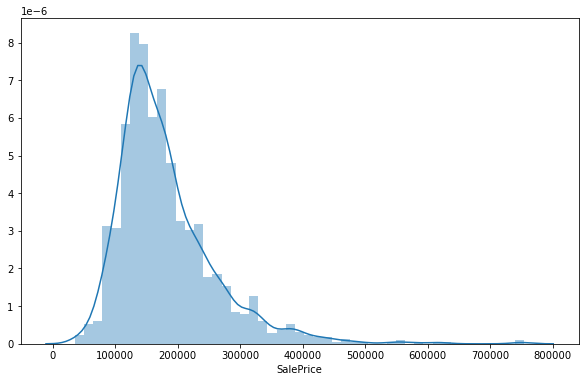

In [8]:
# Understanding target variable distribution

plt.figure(figsize = (10,6))
sns.distplot(housing.SalePrice);

**The target variable 'SalePrice' is right skewed** 

In [9]:
from scipy import stats
housing['SalePrice'].skew()

1.8828757597682129

In [10]:
housing['SalePrice'].kurtosis()

6.536281860064529

Skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. The acceptable range for skewness is between -1 and 1. Beyond this range, variable is considered to be highly skewed.

**'SalePrice' has a skew of ~1.89 indicating a skew.**

Kurtosis is a measure of the “tailedness” of the probability distribution. A standard normal distribution has kurtosis of 3.

**'SalePrice' has a kurtosis of ~6.54 indicating a tail.**

As per the distribution graph and values for skew and kurtosis, the 'SalePrice' variable needs to be treated.

Since the target variable is right skewed, the best ways to remove the skewness and make it symmetric is to go for log transform(natural log) or power transform.

Trying **log transform**.

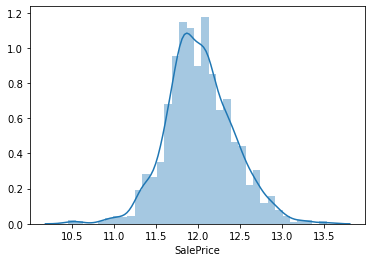

In [11]:
sns.distplot(np.log(housing['SalePrice']));

**Log transform appears to work in converting SalePrice to a normal distribution**

Proceeding with log transform and saving it as a new variable SalePriceT.

In [12]:
housing['SalePriceT'] = np.log(housing['SalePrice'])
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceT
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216


#### 2. Understanding actual NA values and replacing in case of non-missing values

As per the data definition file, certain variables have values NA indicating a specific value. 

Replacing these NA values with 'None' to avoid incorrect observations.

In [13]:
housing['Alley'].fillna('None',inplace=True)
housing['BsmtQual'].fillna('None',inplace=True)
housing['BsmtCond'].fillna('None',inplace=True)
housing['BsmtExposure'].fillna('None',inplace=True)
housing['BsmtFinType1'].fillna('None',inplace=True)
housing['BsmtFinType2'].fillna('None',inplace=True)
housing['FireplaceQu'].fillna('None',inplace=True)
housing['GarageType'].fillna('None',inplace=True)
housing['GarageFinish'].fillna('None',inplace=True)
housing['GarageQual'].fillna('None',inplace=True)
housing['GarageCond'].fillna('None',inplace=True)
housing['PoolQC'].fillna('None',inplace=True)
housing['Fence'].fillna('None',inplace=True)
housing['MiscFeature'].fillna('None',inplace=True)

In [14]:
# Rechecking missing values
findnull(housing).head(6)

,Total,Percent
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
Foundation,0,0.000000


Imputing values for numeric and categorical columns where missing data is less than 20% by median and mode values respectively.

In [15]:
housing['LotFrontage'].replace(np.NaN,housing['LotFrontage'].median(),inplace=True)
housing['GarageYrBlt'].replace(np.NaN,housing['GarageYrBlt'].mode()[0],inplace=True)
housing['MasVnrArea'].replace(np.NaN,housing['MasVnrArea'].median(),inplace=True)
housing['MasVnrType'].replace(np.NaN,housing['MasVnrType'].mode()[0],inplace=True)
housing['Electrical'].replace(np.NaN,housing['Electrical'].mode()[0],inplace=True)

In [16]:
findnull(housing).head()

,Total,Percent
SalePriceT,0,0.0
HeatingQC,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


#### 3. Converting year fields to age fields ####

In [17]:
# 'YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'
housing['houseAge'] = 2021-housing['YearBuilt']
housing['houseRemodAge'] = 2021-housing['YearRemodAdd']
housing['garageAge'] = 2021-housing['GarageYrBlt']
housing['yrsSinceLastSold'] = 2021-housing['YrSold']

In [18]:
# Dropping original columns
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [19]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,SalePriceT,houseAge,houseRemodAge,garageAge,yrsSinceLastSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,2,WD,Normal,208500,12.247694,18,18,18.0,13
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,5,WD,Normal,181500,12.109011,45,45,45.0,14
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,9,WD,Normal,223500,12.317167,20,19,20.0,13
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,2,WD,Abnorml,140000,11.849398,106,51,23.0,15
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,12,WD,Normal,250000,12.429216,21,21,21.0,13


In [20]:
# Converting data to correct formats
incorrectObj = ['MSSubClass','OverallQual','OverallCond','MoSold']
for i in incorrectObj:
    housing[i]=housing[i].astype('object')
    print(i,housing[i].dtype)
# housing.loc([[incorrectObj]],axis=1).dtypes

MSSubClass object
OverallQual object
OverallCond object
MoSold object


In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   object 
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   object 
 5   Alley             1460 non-null   object 
 6   LotShape          1460 non-null   object 
 7   LandContour       1460 non-null   object 
 8   Utilities         1460 non-null   object 
 9   LotConfig         1460 non-null   object 
 10  LandSlope         1460 non-null   object 
 11  Neighborhood      1460 non-null   object 
 12  Condition1        1460 non-null   object 
 13  Condition2        1460 non-null   object 
 14  BldgType          1460 non-null   object 
 15  HouseStyle        1460 non-null   object 
 16  OverallQual       1460 non-null   object 


In [22]:
new_cols = ['BsmtFinSF2','LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 
            '3SsnPorch',  'ScreenPorch',  'PoolArea',  'MiscVal']

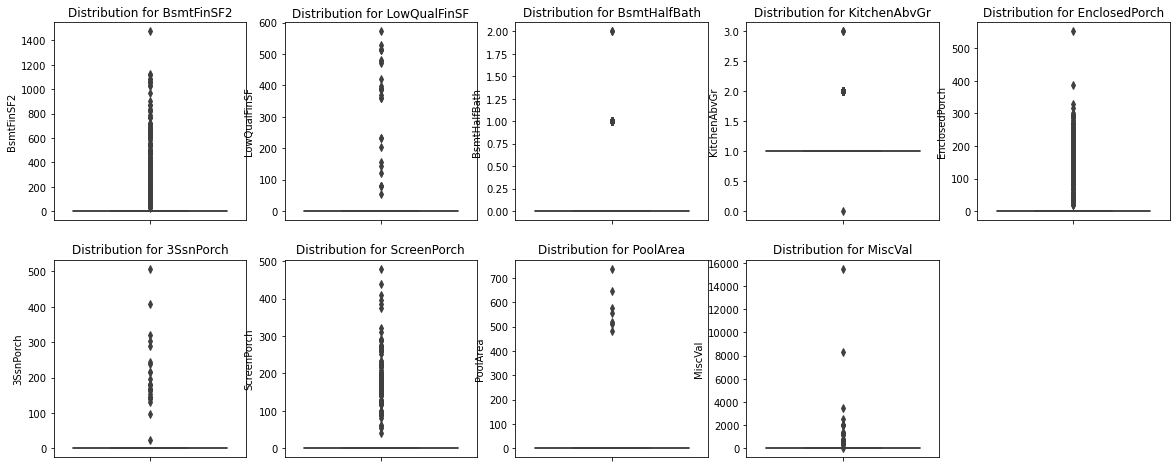

In [23]:
plt.figure(figsize=(20,8))
plt.tight_layout()
for i in range(1,len(new_cols)+1):
    plt.subplot(2,5,i)
    sns.boxplot(housing[new_cols[i-1]],orient='v')
    plt.title("Distribution for "+new_cols[i-1])
plt.show()

In [24]:
#Dropping numerical columns with very little variance in data
housing.drop(new_cols,axis=1,inplace=True)

#### 4. Univariate analysis

In [25]:
cat_cols = list(housing.select_dtypes(include=['object']).columns)
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [26]:
def func_plotcatbar(field,dataset=housing):
    print(field)
    a = dataset[field].value_counts(normalize=True)*100
    print(a)
    aDict = dict(dataset[field].value_counts(normalize=True)*100)
    print(aDict.keys())
    plt.figure(figsize=(8,4))
    sns.barplot(x=a.index,y=a)
    plt.xticks(rotation=45)
    plt.title('Value Distribution of '+field)
    plt.show()

MSSubClass
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
dict_keys([20, 60, 50, 120, 30, 160, 70, 80, 90, 190, 85, 75, 45, 180, 40])


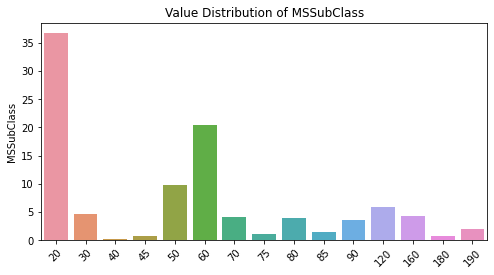

MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
dict_keys(['RL', 'RM', 'FV', 'RH', 'C (all)'])


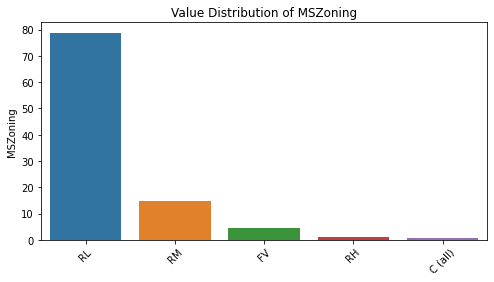

Street
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
dict_keys(['Pave', 'Grvl'])


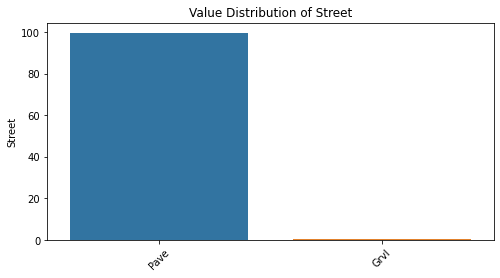

Alley
None    93.767123
Grvl     3.424658
Pave     2.808219
Name: Alley, dtype: float64
dict_keys(['None', 'Grvl', 'Pave'])


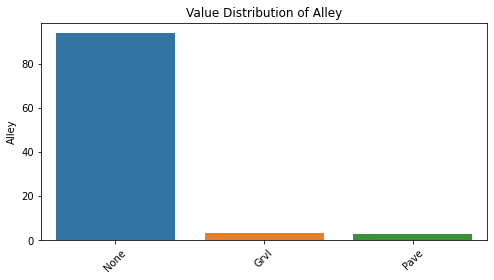

LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
dict_keys(['Reg', 'IR1', 'IR2', 'IR3'])


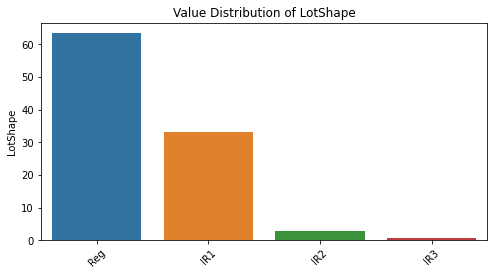

LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
dict_keys(['Lvl', 'Bnk', 'HLS', 'Low'])


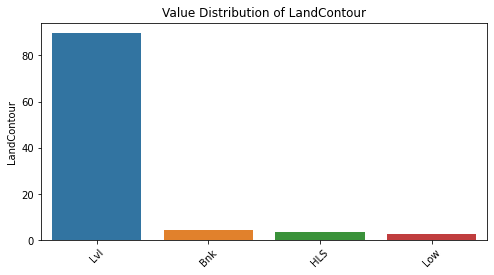

Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
dict_keys(['AllPub', 'NoSeWa'])


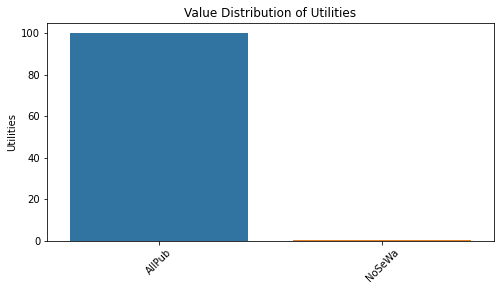

LotConfig
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
dict_keys(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'])


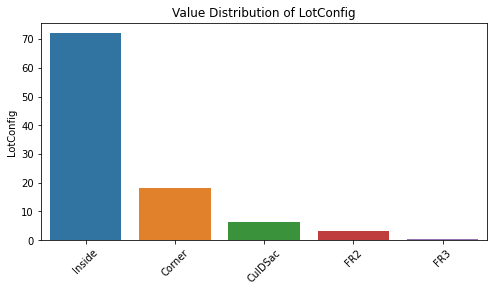

LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
dict_keys(['Gtl', 'Mod', 'Sev'])


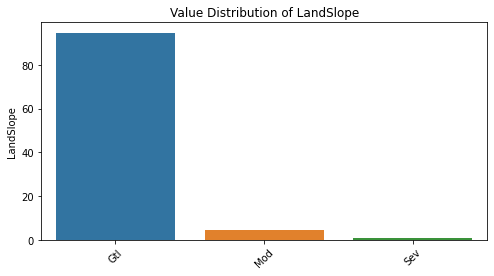

Neighborhood
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
SWISU       1.712329
StoneBr     1.712329
MeadowV     1.164384
Blmngtn     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64
dict_keys(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor', 'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'SWISU', 'StoneBr', 'MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'])


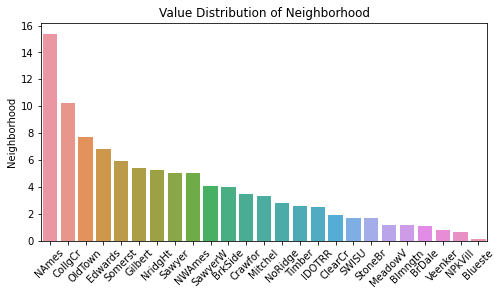

Condition1
Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64
dict_keys(['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe'])


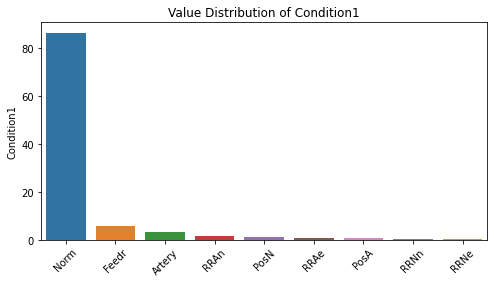

Condition2
Norm      98.972603
Feedr      0.410959
Artery     0.136986
RRNn       0.136986
PosN       0.136986
RRAn       0.068493
RRAe       0.068493
PosA       0.068493
Name: Condition2, dtype: float64
dict_keys(['Norm', 'Feedr', 'Artery', 'RRNn', 'PosN', 'RRAn', 'RRAe', 'PosA'])


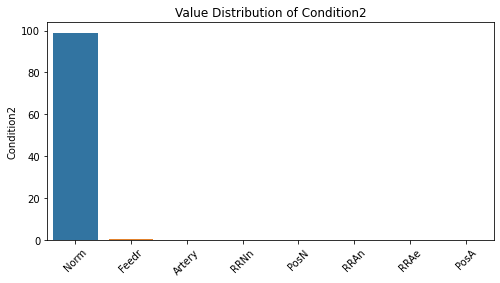

BldgType
1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64
dict_keys(['1Fam', 'TwnhsE', 'Duplex', 'Twnhs', '2fmCon'])


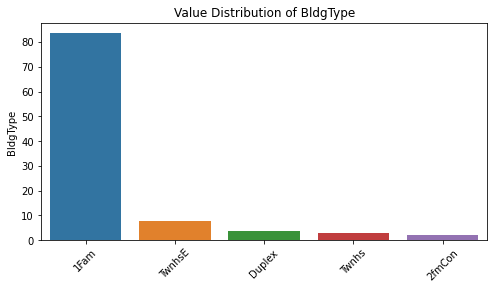

HouseStyle
1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: HouseStyle, dtype: float64
dict_keys(['1Story', '2Story', '1.5Fin', 'SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'])


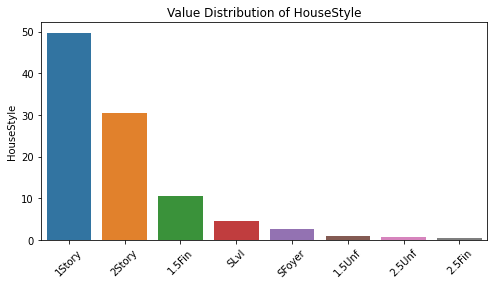

OverallQual
5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: OverallQual, dtype: float64
dict_keys([5, 6, 7, 8, 4, 9, 3, 10, 2, 1])


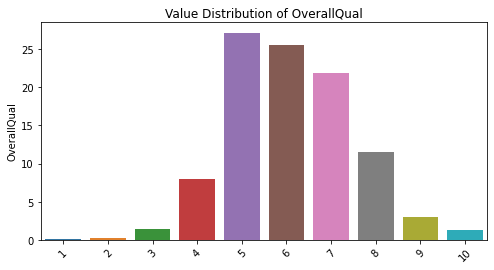

OverallCond
5    56.232877
6    17.260274
7    14.041096
8     4.931507
4     3.904110
3     1.712329
9     1.506849
2     0.342466
1     0.068493
Name: OverallCond, dtype: float64
dict_keys([5, 6, 7, 8, 4, 3, 9, 2, 1])


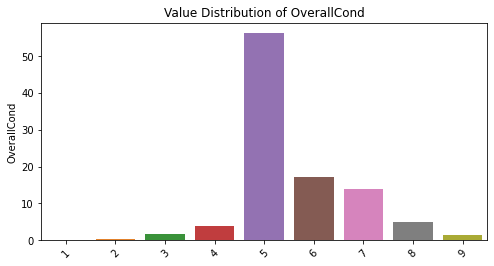

RoofStyle
Gable      78.150685
Hip        19.589041
Flat        0.890411
Gambrel     0.753425
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64
dict_keys(['Gable', 'Hip', 'Flat', 'Gambrel', 'Mansard', 'Shed'])


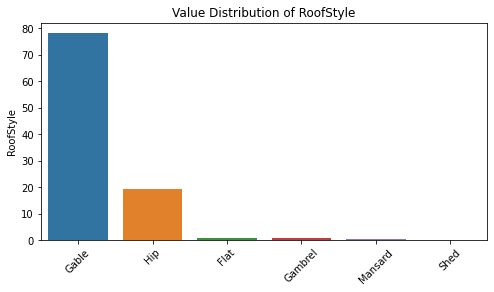

RoofMatl
CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
ClyTile     0.068493
Membran     0.068493
Metal       0.068493
Roll        0.068493
Name: RoofMatl, dtype: float64
dict_keys(['CompShg', 'Tar&Grv', 'WdShngl', 'WdShake', 'ClyTile', 'Membran', 'Metal', 'Roll'])


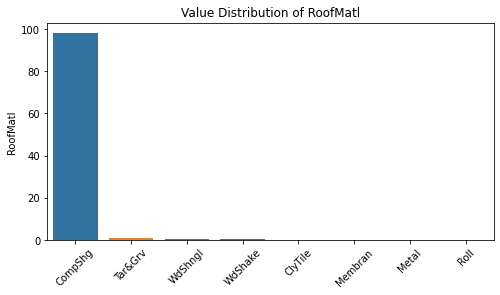

Exterior1st
VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Stone       0.136986
BrkComm     0.136986
AsphShn     0.068493
ImStucc     0.068493
CBlock      0.068493
Name: Exterior1st, dtype: float64
dict_keys(['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', 'CemntBd', 'BrkFace', 'WdShing', 'Stucco', 'AsbShng', 'Stone', 'BrkComm', 'AsphShn', 'ImStucc', 'CBlock'])


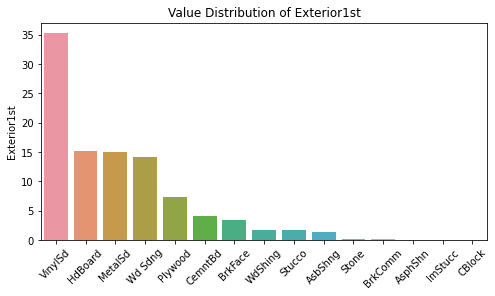

Exterior2nd
VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
ImStucc     0.684932
Brk Cmn     0.479452
Stone       0.342466
AsphShn     0.205479
Other       0.068493
CBlock      0.068493
Name: Exterior2nd, dtype: float64
dict_keys(['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood', 'CmentBd', 'Wd Shng', 'Stucco', 'BrkFace', 'AsbShng', 'ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock'])


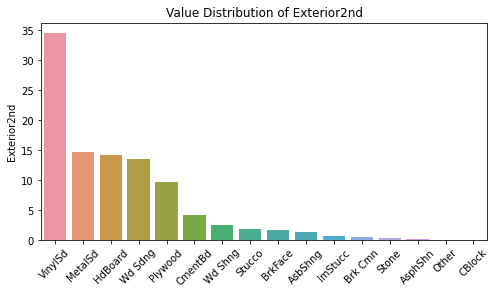

MasVnrType
None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64
dict_keys(['None', 'BrkFace', 'Stone', 'BrkCmn'])


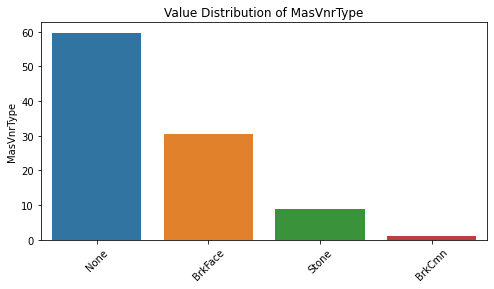

ExterQual
TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64
dict_keys(['TA', 'Gd', 'Ex', 'Fa'])


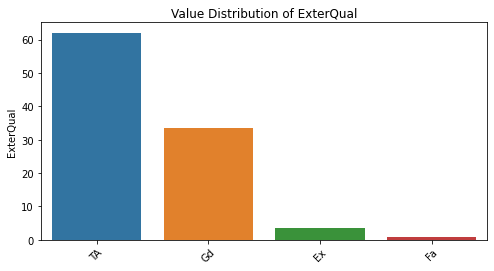

ExterCond
TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64
dict_keys(['TA', 'Gd', 'Fa', 'Ex', 'Po'])


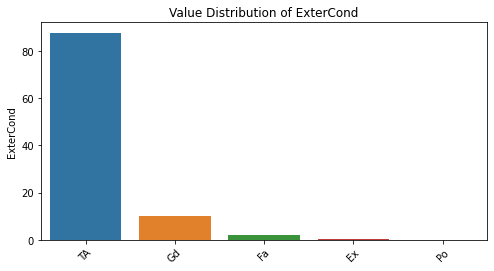

Foundation
PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64
dict_keys(['PConc', 'CBlock', 'BrkTil', 'Slab', 'Stone', 'Wood'])


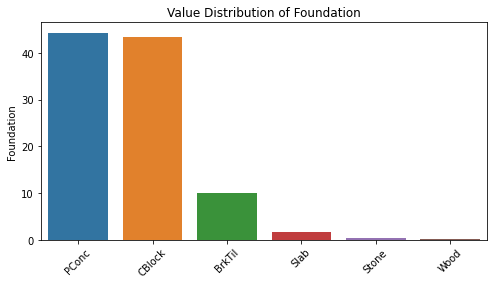

BsmtQual
TA      44.452055
Gd      42.328767
Ex       8.287671
None     2.534247
Fa       2.397260
Name: BsmtQual, dtype: float64
dict_keys(['TA', 'Gd', 'Ex', 'None', 'Fa'])


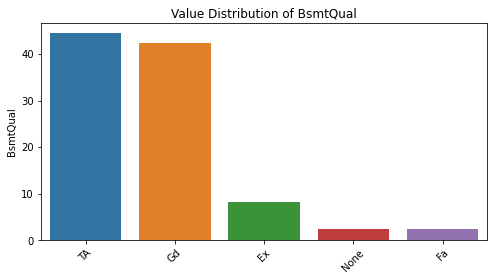

BsmtCond
TA      89.794521
Gd       4.452055
Fa       3.082192
None     2.534247
Po       0.136986
Name: BsmtCond, dtype: float64
dict_keys(['TA', 'Gd', 'Fa', 'None', 'Po'])


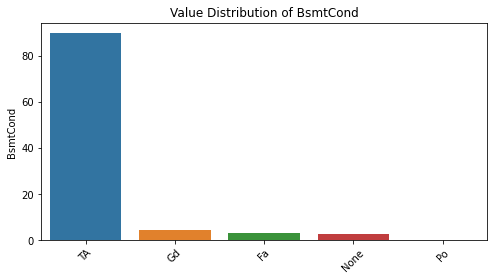

BsmtExposure
No      65.273973
Av      15.136986
Gd       9.178082
Mn       7.808219
None     2.602740
Name: BsmtExposure, dtype: float64
dict_keys(['No', 'Av', 'Gd', 'Mn', 'None'])


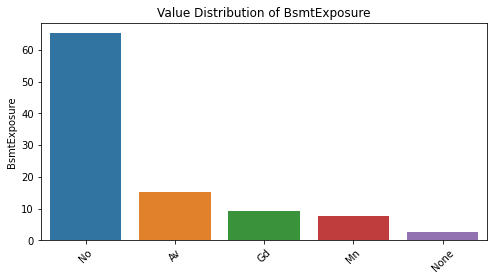

BsmtFinType1
Unf     29.452055
GLQ     28.630137
ALQ     15.068493
BLQ     10.136986
Rec      9.109589
LwQ      5.068493
None     2.534247
Name: BsmtFinType1, dtype: float64
dict_keys(['Unf', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'None'])


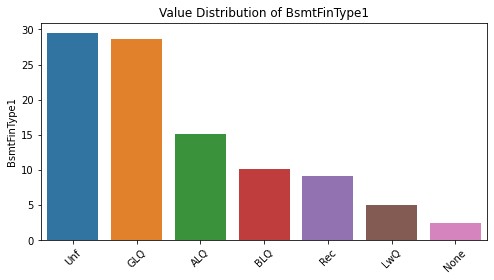

BsmtFinType2
Unf     86.027397
Rec      3.698630
LwQ      3.150685
None     2.602740
BLQ      2.260274
ALQ      1.301370
GLQ      0.958904
Name: BsmtFinType2, dtype: float64
dict_keys(['Unf', 'Rec', 'LwQ', 'None', 'BLQ', 'ALQ', 'GLQ'])


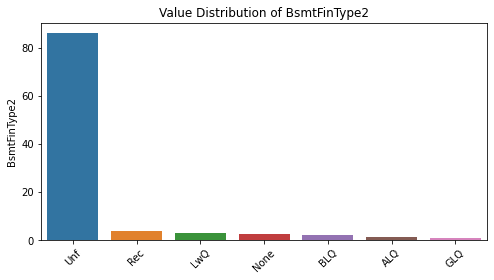

Heating
GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64
dict_keys(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'])


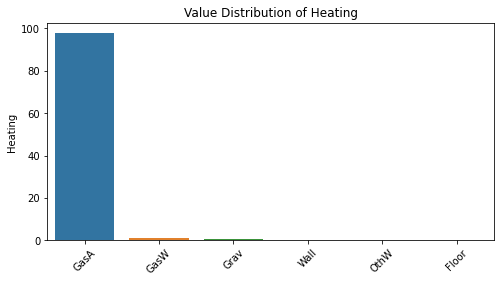

HeatingQC
Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: HeatingQC, dtype: float64
dict_keys(['Ex', 'TA', 'Gd', 'Fa', 'Po'])


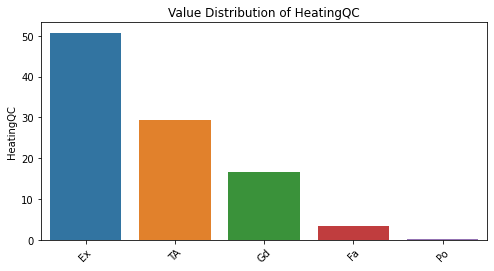

CentralAir
Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64
dict_keys(['Y', 'N'])


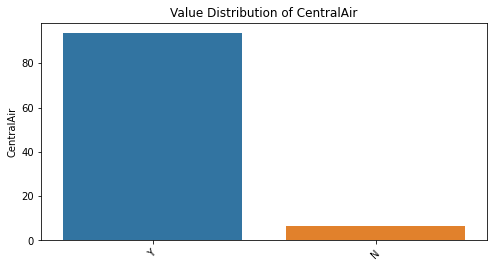

Electrical
SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64
dict_keys(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'])


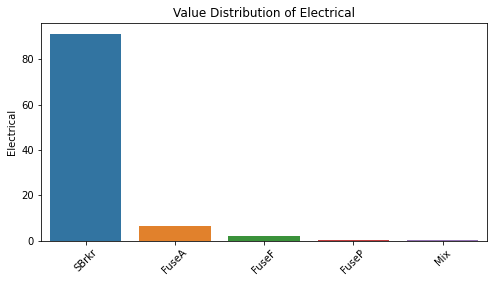

KitchenQual
TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: KitchenQual, dtype: float64
dict_keys(['TA', 'Gd', 'Ex', 'Fa'])


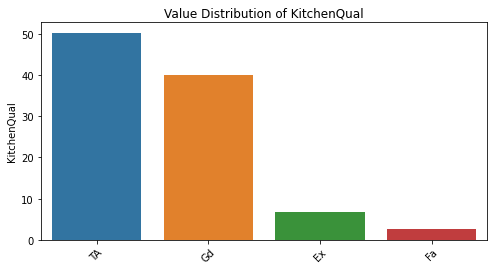

Functional
Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64
dict_keys(['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Maj2', 'Sev'])


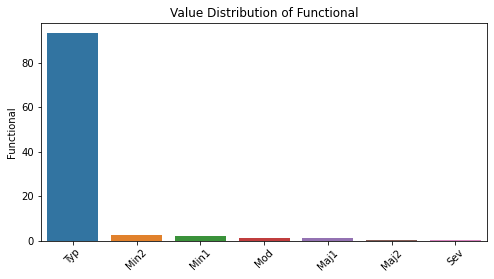

FireplaceQu
None    47.260274
Gd      26.027397
TA      21.438356
Fa       2.260274
Ex       1.643836
Po       1.369863
Name: FireplaceQu, dtype: float64
dict_keys(['None', 'Gd', 'TA', 'Fa', 'Ex', 'Po'])


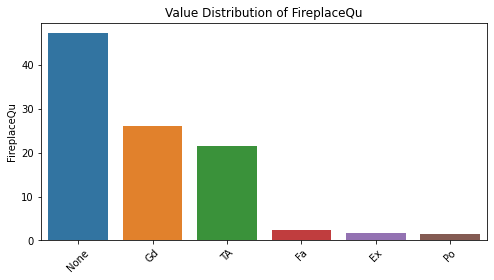

GarageType
Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
None        5.547945
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64
dict_keys(['Attchd', 'Detchd', 'BuiltIn', 'None', 'Basment', 'CarPort', '2Types'])


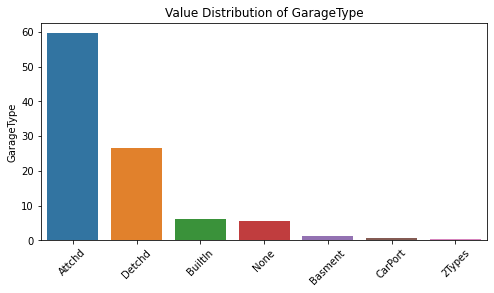

GarageFinish
Unf     41.438356
RFn     28.904110
Fin     24.109589
None     5.547945
Name: GarageFinish, dtype: float64
dict_keys(['Unf', 'RFn', 'Fin', 'None'])


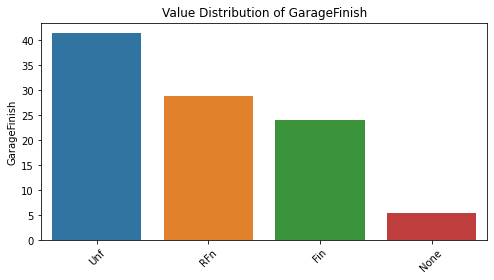

GarageQual
TA      89.794521
None     5.547945
Fa       3.287671
Gd       0.958904
Ex       0.205479
Po       0.205479
Name: GarageQual, dtype: float64
dict_keys(['TA', 'None', 'Fa', 'Gd', 'Ex', 'Po'])


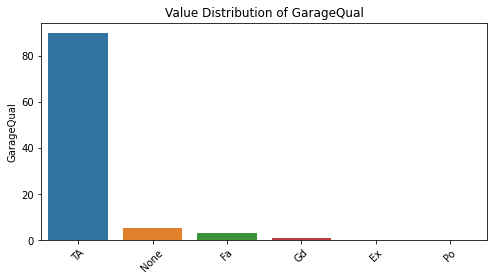

GarageCond
TA      90.821918
None     5.547945
Fa       2.397260
Gd       0.616438
Po       0.479452
Ex       0.136986
Name: GarageCond, dtype: float64
dict_keys(['TA', 'None', 'Fa', 'Gd', 'Po', 'Ex'])


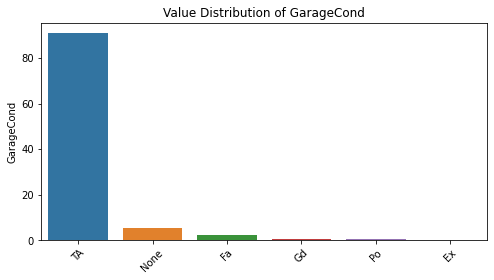

PavedDrive
Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64
dict_keys(['Y', 'N', 'P'])


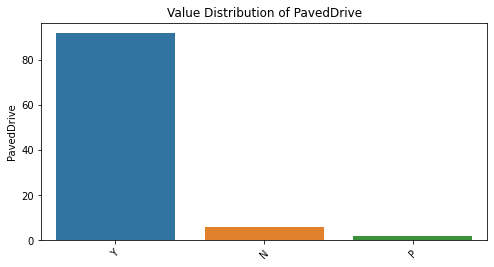

PoolQC
None    99.520548
Gd       0.205479
Ex       0.136986
Fa       0.136986
Name: PoolQC, dtype: float64
dict_keys(['None', 'Gd', 'Ex', 'Fa'])


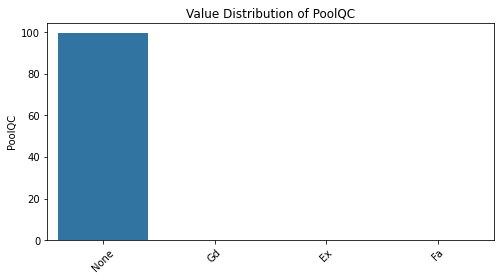

Fence
None     80.753425
MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64
dict_keys(['None', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'])


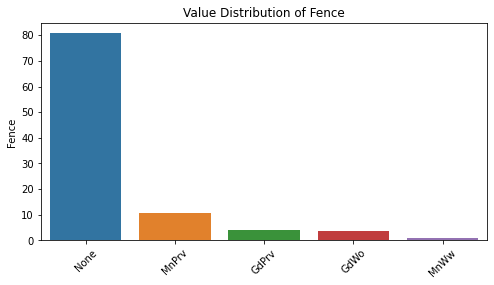

MiscFeature
None    96.301370
Shed     3.356164
Gar2     0.136986
Othr     0.136986
TenC     0.068493
Name: MiscFeature, dtype: float64
dict_keys(['None', 'Shed', 'Gar2', 'Othr', 'TenC'])


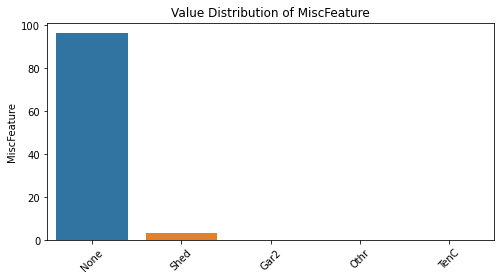

MoSold
6     17.328767
7     16.027397
5     13.972603
4      9.657534
8      8.356164
3      7.260274
10     6.095890
11     5.410959
9      4.315068
12     4.041096
1      3.972603
2      3.561644
Name: MoSold, dtype: float64
dict_keys([6, 7, 5, 4, 8, 3, 10, 11, 9, 12, 1, 2])


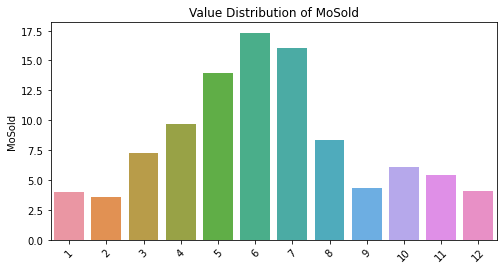

SaleType
WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLw     0.342466
ConLI     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64
dict_keys(['WD', 'New', 'COD', 'ConLD', 'ConLw', 'ConLI', 'CWD', 'Oth', 'Con'])


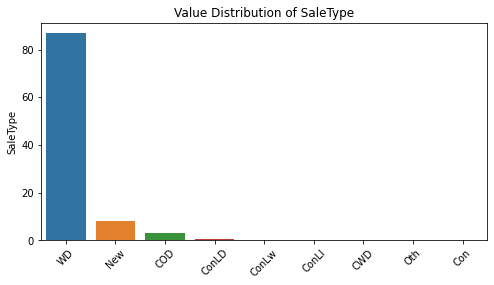

SaleCondition
Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64
dict_keys(['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'])


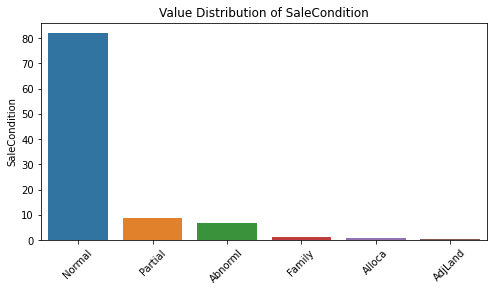

In [27]:
for cat in cat_cols:
    func_plotcatbar(cat)

In [28]:
#Combining values where values are <10% 
housing['MSSubClass'].replace([50, 120, 30, 160, 70, 80, 90, 190, 85, 75, 45, 180, 40],'Others',inplace=True) 
housing['MSZoning'].replace(['FV', 'RH', 'C (all)'],'Others',inplace=True)
housing['LotShape'].replace(['IR2', 'IR3'],'Others',inplace=True) 
housing['LotConfig'].replace(['CulDSac', 'FR2', 'FR3'],'Others',inplace=True) 
housing['Neighborhood'].replace(['OldTown', 'Edwards', 'Somerst', 'Gilbert', 'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 
                          'BrkSide', 'Crawfor', 'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'SWISU', 
                          'StoneBr', 'MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'],
                         'Others',inplace=True)
housing['BldgType'].replace(['TwnhsE','Duplex', 'Twnhs', '2fmCon'],'Others',inplace=True) 
housing['HouseStyle'].replace(['SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'],'Others',inplace=True) 
housing['OverallQual'].replace([4, 9, 3, 10, 2, 1],'Others',inplace=True) 
housing['OverallCond'].replace([8, 4, 3, 9, 2, 1],'Others',inplace=True)
housing['RoofStyle'].replace(['Flat', 'Gambrel', 'Mansard', 'Shed'],'Others',inplace=True) 
housing['Exterior1st'].replace(['Plywood', 'CemntBd', 'BrkFace', 'WdShing', 'Stucco', 'AsbShng', 'Stone', 'BrkComm', 
                                 'AsphShn', 'CBlock', 'ImStucc'],'Others',inplace=True) 
housing['Exterior2nd'].replace(['Plywood', 'CmentBd', 'Wd Shng', 'Stucco', 'BrkFace', 'AsbShng', 'ImStucc', 'Brk Cmn', 
                                 'Stone', 'AsphShn', 'CBlock', 'Other'],'Others',inplace=True) 
housing['MasVnrType'].replace(['Stone', 'BrkCmn'],'Others',inplace=True) 
housing['ExterQual'].replace(['Ex', 'Fa'],'Others',inplace=True) 
housing['Foundation'].replace(['Slab', 'Stone', 'Wood'],'Others',inplace=True) 
housing['BsmtQual'].replace(['Ex', 'Fa'],'Others',inplace=True) 
housing['BsmtExposure'].replace(['Gd', 'Mn'],'Others',inplace=True) 
housing['BsmtFinType1'].replace(['Rec', 'LwQ','None'],'Others',inplace=True) 
housing['HeatingQC'].replace(['Fa', 'Po'],'Others',inplace=True) 
housing['KitchenQual'].replace(['Ex', 'Fa'],'Others',inplace=True) 
housing['FireplaceQu'].replace(['Ex', 'Fa', 'Po'],'Others',inplace=True) 
housing['GarageType'].replace(['BuiltIn', 'None', 'Basment', 'CarPort', '2Types'],'Others',inplace=True) 
housing['Fence'].replace(['GdPrv', 'GdWo', 'MnWw'],'Others',inplace=True) 
housing['SaleCondition'].replace(['Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'],'Others',inplace=True) 
housing['MoSold'].replace([4, 8, 3, 10, 11, 9, 12, 1, 2],'Others',inplace=True)

In [29]:
# Dropping columns with highly skewed data i.e. >85% in one value. 
housing.drop(['Alley','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','ExterCond',
               'BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond',
              'PavedDrive','PoolQC','MiscFeature','SaleType'],axis=1,inplace=True)

In [30]:
housing.shape

(1460, 52)

**5. Bivariate and Multivariate analysis**

In [31]:
num_cols = list(housing.describe().columns)

In [32]:
pair_cols = ['LotArea','MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
             'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'SalePriceT', 'houseAge', 'houseRemodAge']

<Figure size 2160x2160 with 0 Axes>

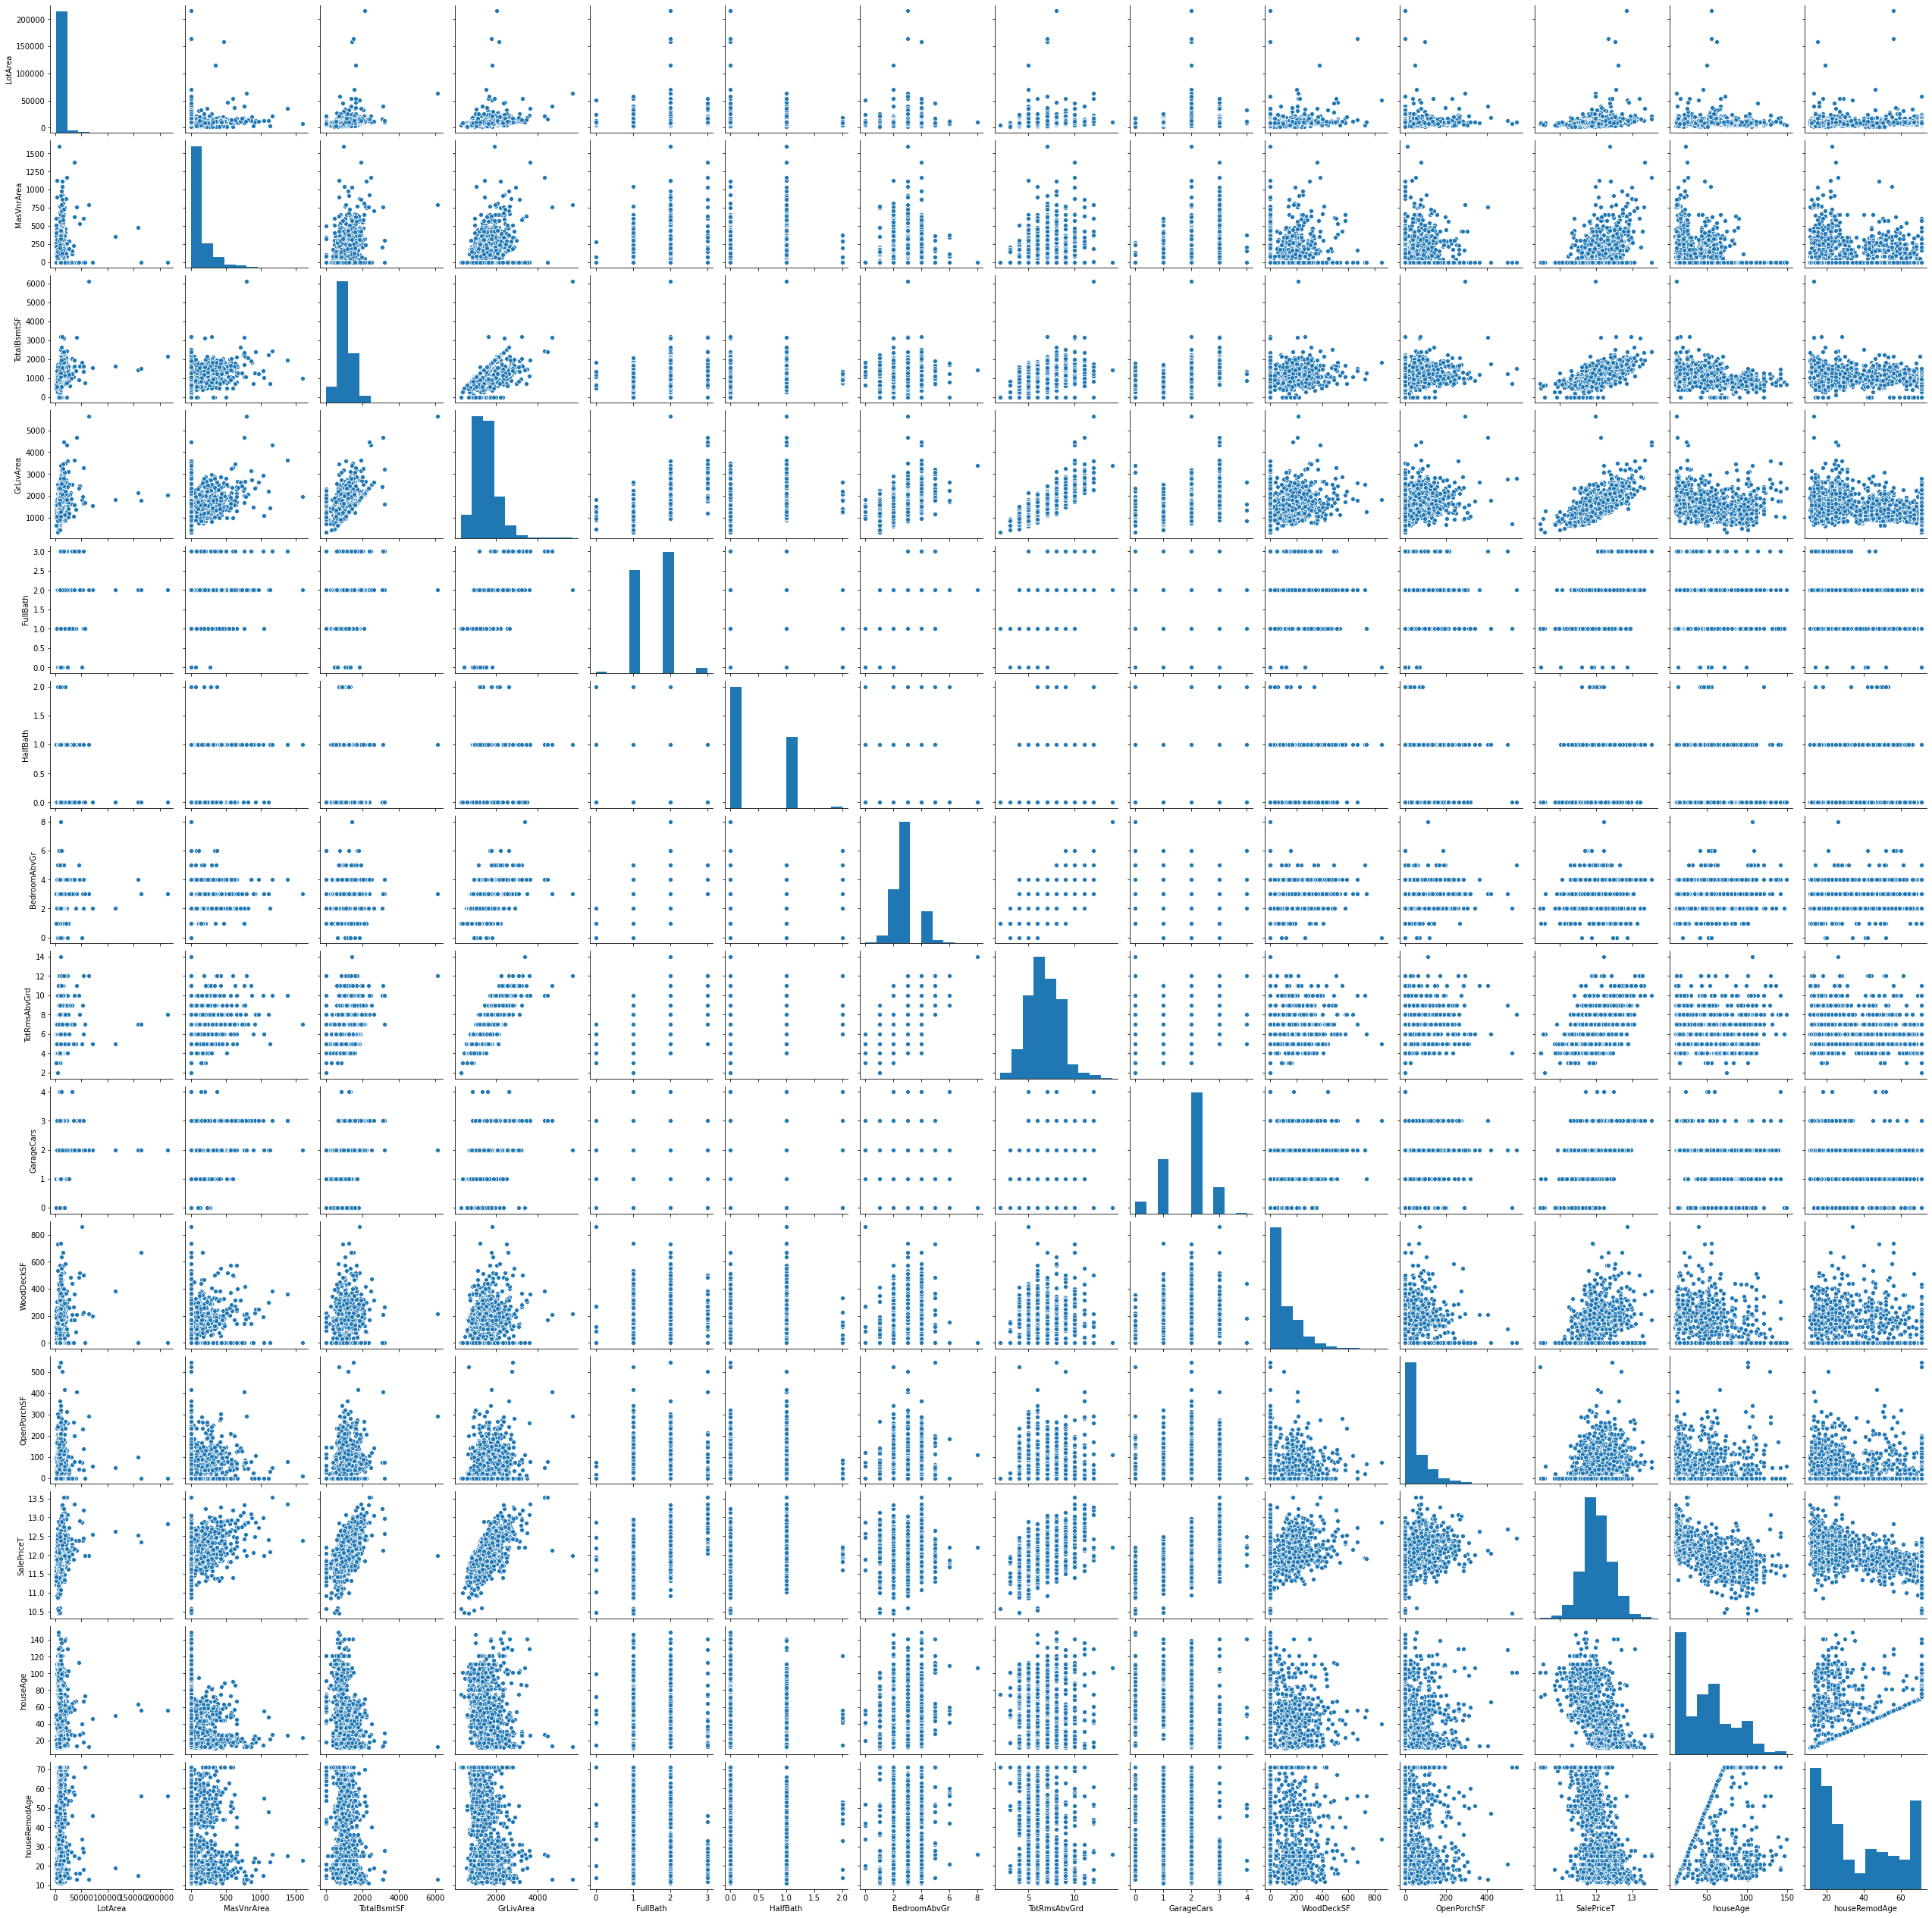

In [33]:
plt.figure(figsize=(30,30))
sns.pairplot(housing[pair_cols]);

In [34]:
housing[num_cols].corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,SalePriceT,houseAge,houseRemodAge,garageAge,yrsSinceLastSold
LotFrontage,1.000000,0.304522,0.178469,0.214367,0.124098,0.363472,0.413773,0.072388,0.368007,0.090343,...,0.269539,0.323511,0.075542,0.137014,0.334771,0.335292,-0.116685,-0.083348,-0.038892,-0.006380
LotArea,0.304522,1.000000,0.103321,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,...,0.154871,0.180403,0.171698,0.084774,0.263843,0.257320,-0.014228,-0.013788,0.042198,0.014261
MasVnrArea,0.178469,0.103321,1.000000,0.261256,0.113862,0.360067,0.339850,0.173800,0.388052,0.083010,...,0.361945,0.370884,0.159991,0.122528,0.472614,0.426775,-0.311600,-0.176529,-0.209289,0.008317
BsmtFinSF1,0.214367,0.214103,0.261256,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,...,0.224054,0.296970,0.204306,0.111761,0.386420,0.372023,-0.249503,-0.128451,-0.119267,-0.014359
BsmtUnfSF,0.124098,-0.002618,0.113862,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,...,0.214175,0.183303,-0.005316,0.129005,0.214479,0.221985,-0.149040,-0.181133,-0.172350,0.041258
TotalBsmtSF,0.363472,0.260833,0.360067,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,...,0.434585,0.486665,0.232019,0.247264,0.613581,0.612134,-0.391452,-0.291066,-0.262945,0.014969
1stFlrSF,0.413773,0.299475,0.339850,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,...,0.439317,0.489782,0.235459,0.211671,0.605852,0.596981,-0.281986,-0.240379,-0.182240,0.013604
2ndFlrSF,0.072388,0.050986,0.173800,-0.137079,0.004469,-0.174512,-0.202646,1.000000,0.687501,-0.169494,...,0.183926,0.138347,0.092165,0.208026,0.319334,0.319300,-0.010308,-0.140024,-0.052291,0.028700
GrLivArea,0.368007,0.263116,0.388052,0.208171,0.240257,0.454868,0.566024,0.687501,1.000000,0.034836,...,0.467247,0.468997,0.247433,0.330224,0.708624,0.700927,-0.199010,-0.287389,-0.178186,0.036526
BsmtFullBath,0.090343,0.158155,0.083010,0.649212,-0.422900,0.307351,0.244671,-0.169494,0.034836,1.000000,...,0.131881,0.179189,0.175315,0.067341,0.227122,0.236224,-0.187599,-0.119470,-0.105716,-0.067049


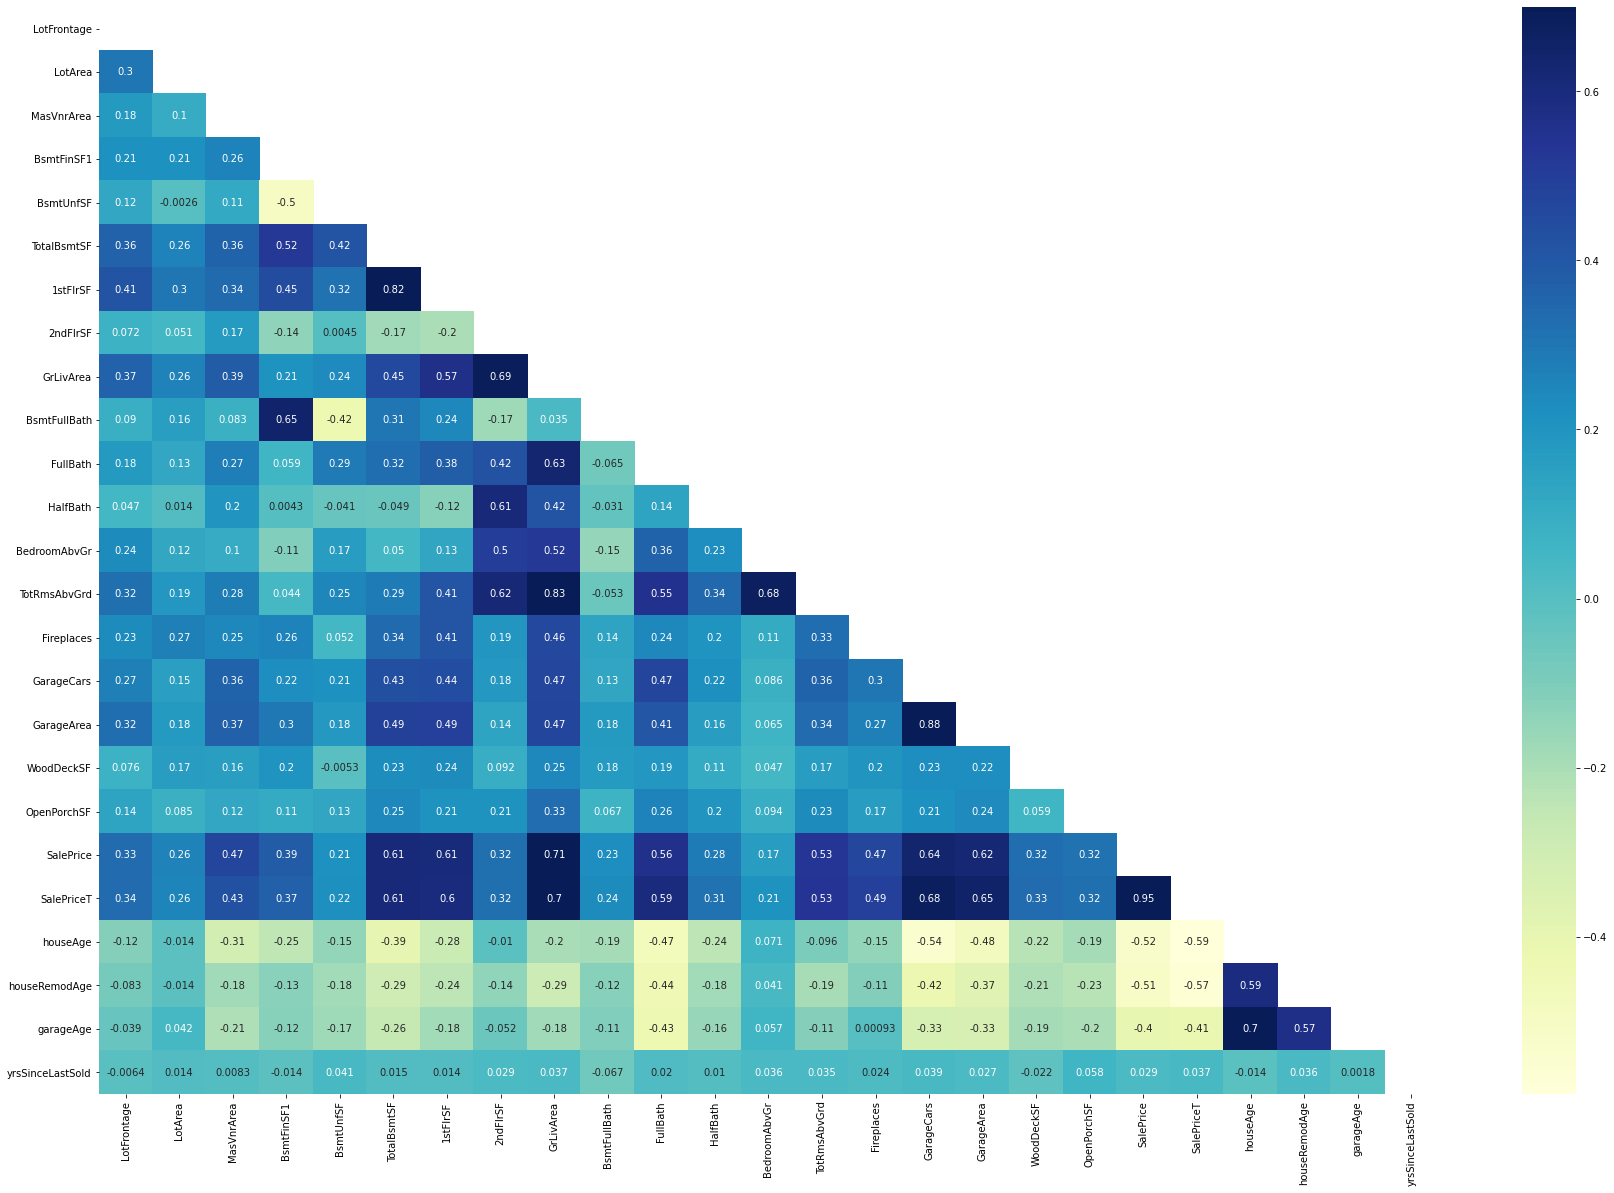

In [35]:
matrix = np.triu(housing[num_cols].corr())
plt.figure(figsize=(30,20))
sns.heatmap(housing[num_cols].corr(),annot=True,cmap='YlGnBu',mask=matrix,vmax=0.7);

The following variables appear to have a high correlation amongst them:
- 1stFlrSF and TotalBsmtSF : ~81%
- TotRmsAbvGrd and GrLivArea : ~82.5%
- GarageCars and GarageArea : ~88%
- HouseAge and GarageAge : ~70%
- SalePrice/SalePriceT and GrLivArea : ~70%

This might lead to multicollinearity issues and require dropping of some of these variables.

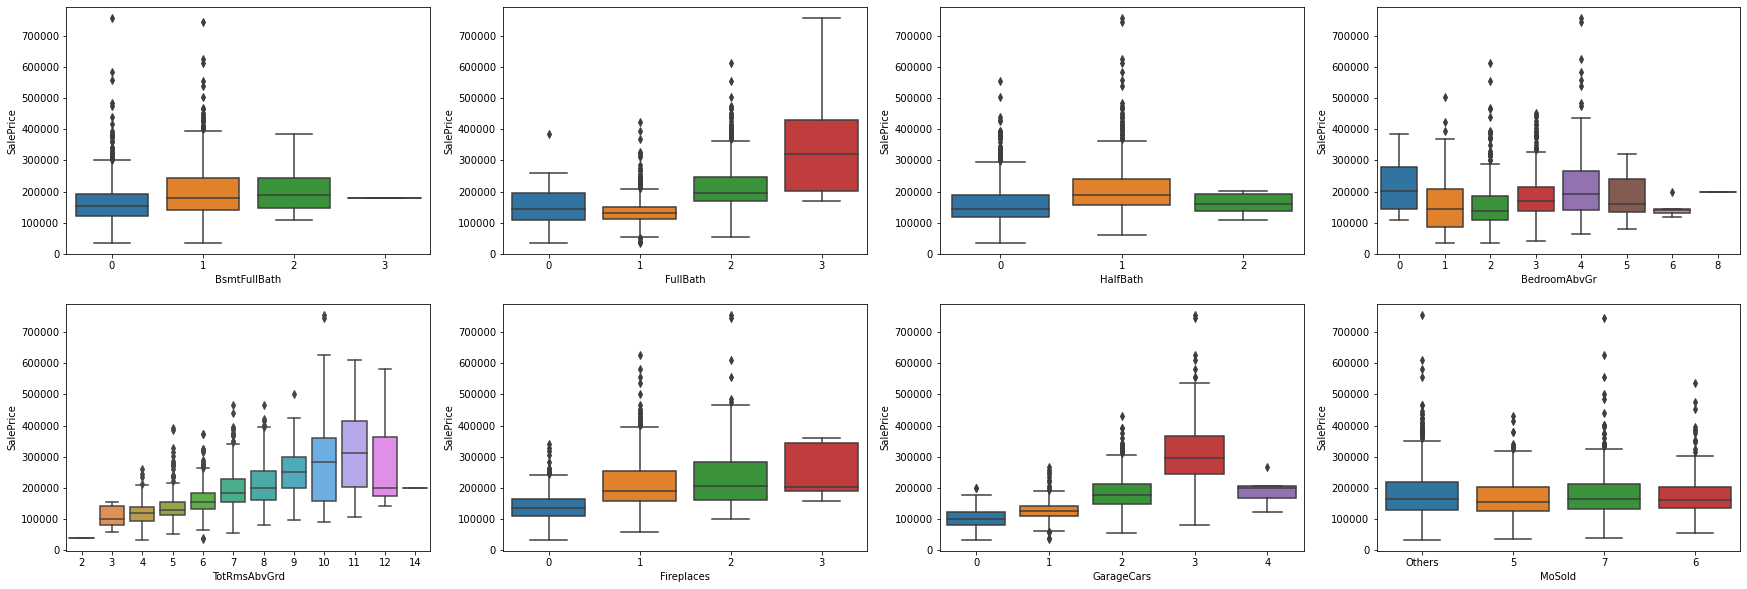

In [36]:
# Checking for relation of discrete value numerical features with target variable

discFeatures =['BsmtFullBath','FullBath', 'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','MoSold']
plt.figure(figsize=(30,10))
plt.tight_layout()
for i in range(1,len(discFeatures)+1):
    plt.subplot(2,4,i)
    sns.boxplot(x=housing[discFeatures[i-1]],y=housing['SalePrice'])
#     plt.title("Distribution for "+num_cols[i-1])
plt.show()

The values of the following features do not appear to make much of an impact on the Sale price:
1. BsmtFullBath
2. HalfBath
3. MoSold

**FullBath**: While having 0 or 1 full baths does not appear to impact Sale Price, higher number of full baths appear to garner higher Sale Price.<br>

**BedroomAbvGr**: Above grade bedrooms don't appear to much impact the Sale Price for 1-5 bedrooms, 0 or 8 bedrooms appear to garner a high price while 6 bedrooms appear to actually display a drop in price. <br>

**TotRmsAbvGrd**: Sale Price appears to have an increasing trend as total number of rooms above grade keeps increasing though median price falls sharply from 12 rooms onwards.<br>

**Fireplaces**: It appears that having Fireplaces helps get higher price though number of actual fireplaces does not impact final sale price.<br>

**GarageCars**: While an imcreasing trend is observed in Sale Price as number of garage cars increases upto 3 cars, there seems to be a drop in Sale Price if property has 4 car space garage.

In [37]:
#Dropping columns with little impact on Sale Price 
housing.drop(['BsmtFullBath','HalfBath','MoSold'],axis=1,inplace=True)

In [38]:
housing.shape

(1460, 49)

#### 6. Outlier Treatment

In [39]:
num_cols = list(housing.describe().columns)
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
housing[num_cols].describe(percentiles=[.25, .5, .75, .90, .95, .99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
LotFrontage,1460.0,69.863699,22.027677,21.000000,60.000000,69.000000,79.000000,92.000000,104.000000,137.410000,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,14381.700000,17401.150000,37567.640000,215245.000000
MasVnrArea,1460.0,103.117123,180.731373,0.000000,0.000000,0.000000,164.250000,335.000000,456.000000,791.280000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,1065.500000,1274.000000,1572.410000,5644.000000
BsmtUnfSF,1460.0,567.240411,441.866955,0.000000,223.000000,477.500000,808.000000,1232.000000,1468.000000,1797.050000,2336.000000
TotalBsmtSF,1460.0,1057.429452,438.705324,0.000000,795.750000,991.500000,1298.250000,1602.200000,1753.000000,2155.050000,6110.000000
1stFlrSF,1460.0,1162.626712,386.587738,334.000000,882.000000,1087.000000,1391.250000,1680.000000,1831.250000,2219.460000,4692.000000
2ndFlrSF,1460.0,346.992466,436.528436,0.000000,0.000000,0.000000,728.000000,954.200000,1141.050000,1418.920000,2065.000000
GrLivArea,1460.0,1515.463699,525.480383,334.000000,1129.500000,1464.000000,1776.750000,2158.300000,2466.100000,3123.480000,5642.000000
FullBath,1460.0,1.565068,0.550916,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000


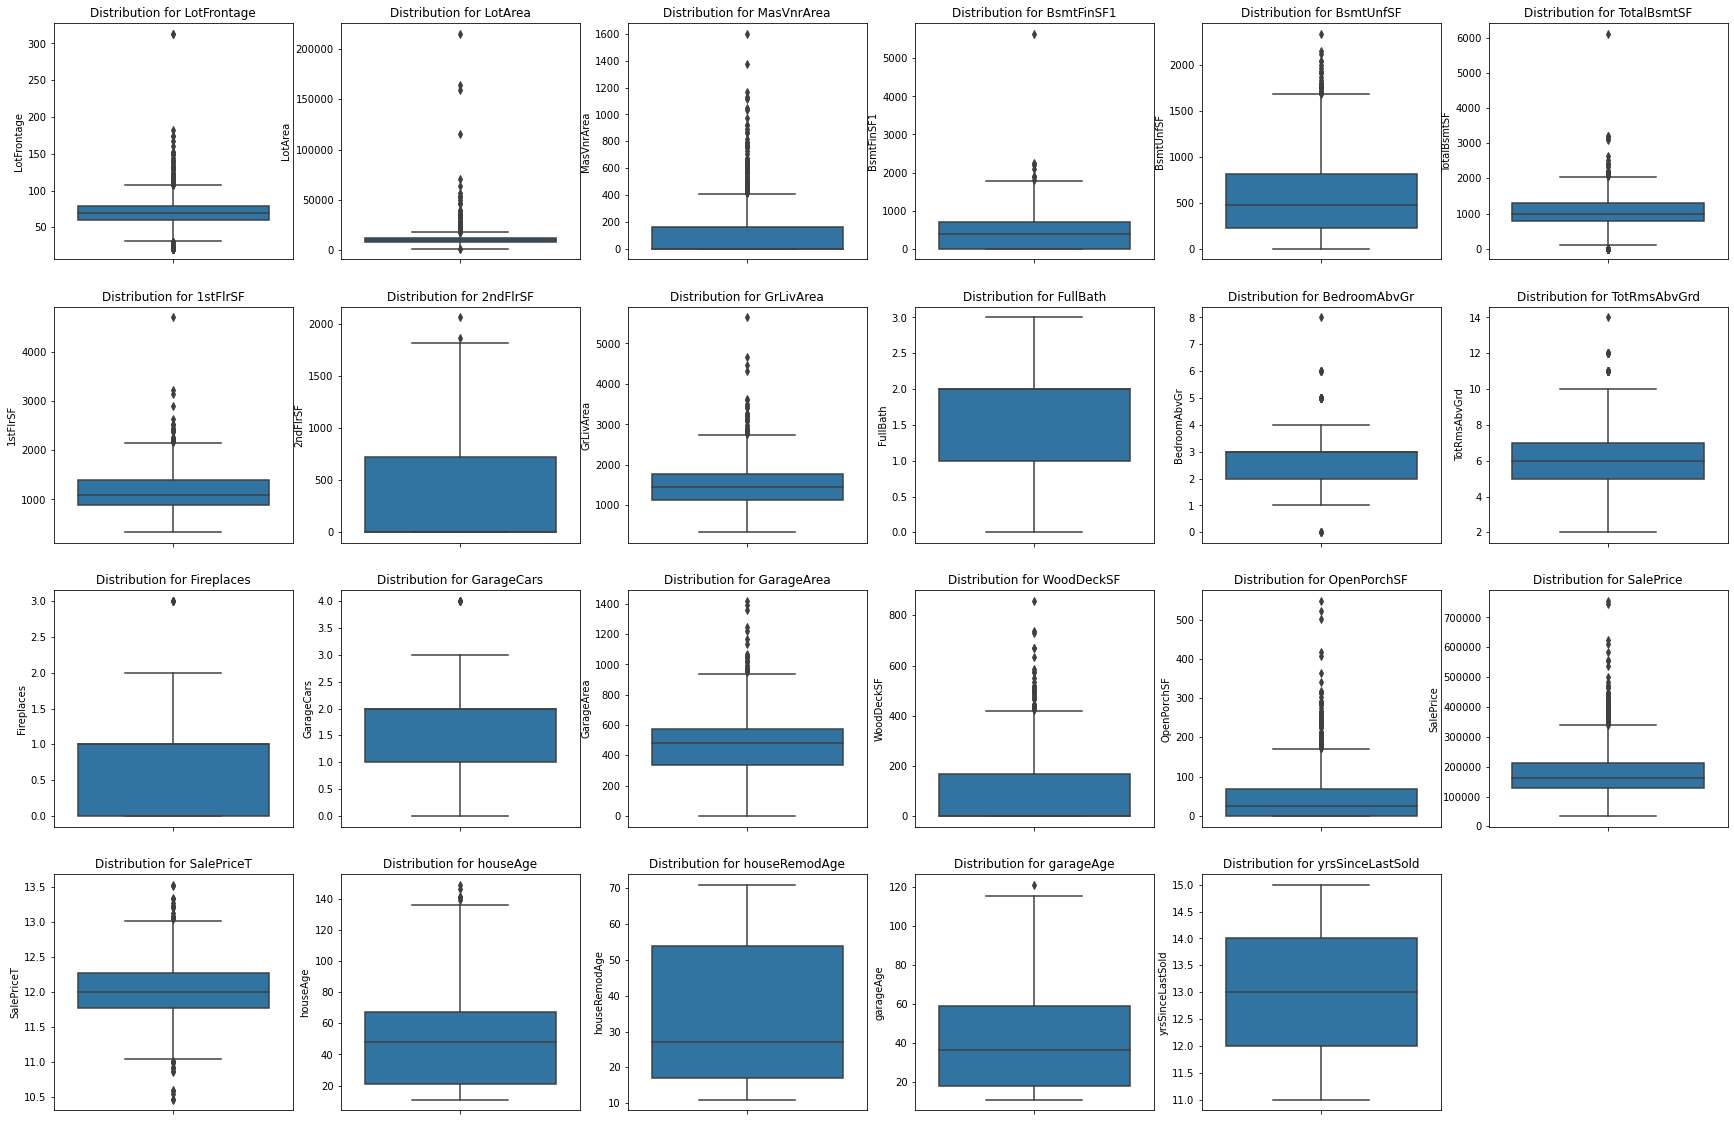

In [40]:
plt.figure(figsize=(30,20))
plt.tight_layout()
for i in range(1,len(num_cols)+1):
    plt.subplot(4,6,i)
    sns.boxplot(housing[num_cols[i-1]],orient='v')
    plt.title("Distribution for "+num_cols[i-1])
plt.show()

In [41]:
outlier_cols1 = ['BsmtFinSF1', '2ndFlrSF', 'Fireplaces', 'GarageCars', 'houseAge', 'garageAge']
outlier_cols2 =['LotFrontage', 'LotArea', 'MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','BedroomAbvGr',
                'TotRmsAbvGrd','GarageArea','WoodDeckSF','OpenPorchSF']

In [42]:
housing.shape

(1460, 49)

Since there appear to be a lot of outliers on the upper side, capping the outlier_cols1 columns to 99% and outlier_cols2 to 95%

In [43]:
cap1 = 0.99

for Vars in outlier_cols1:
    upperLimit = housing[Vars].quantile(cap1)
    housing[Vars] = housing[Vars].apply(lambda x: upperLimit if x>upperLimit else x)
    
cap1 = 0.95

for Vars in outlier_cols2:
    upperLimit = housing[Vars].quantile(cap1)
    housing[Vars] = housing[Vars].apply(lambda x: upperLimit if x>upperLimit else x)


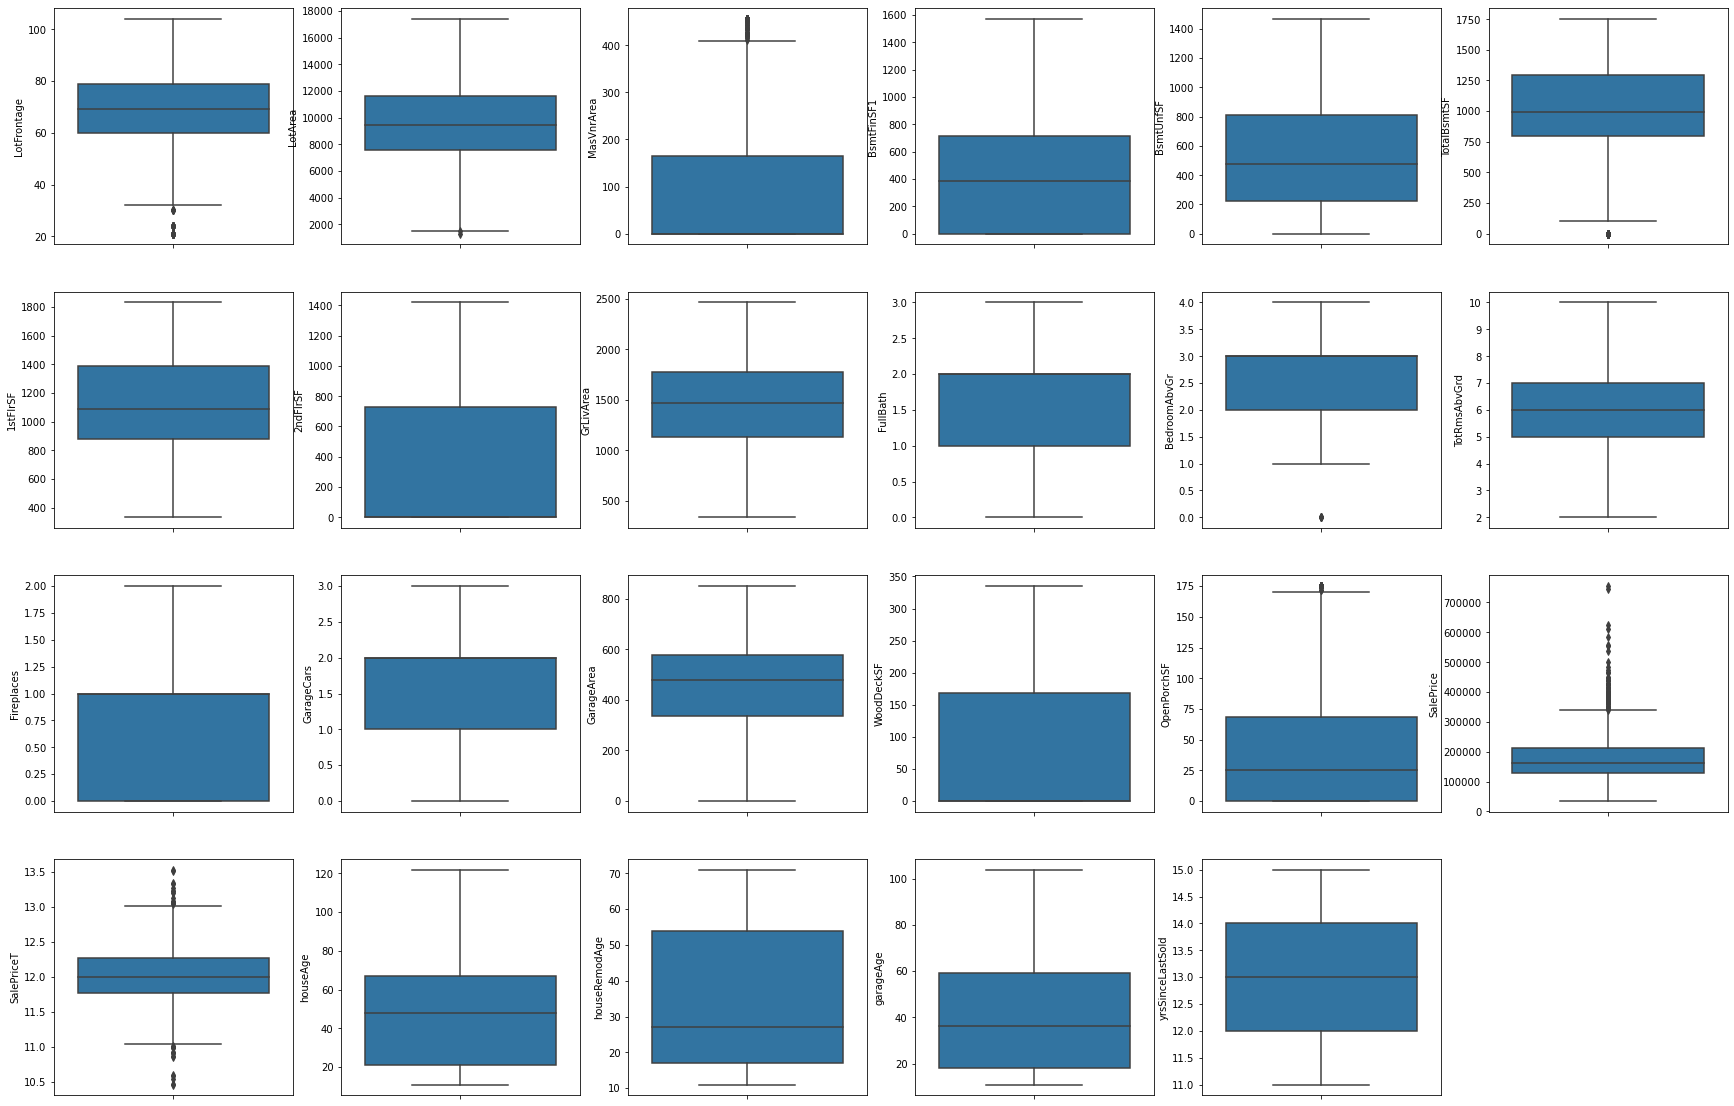

In [44]:
num_cols = list(housing.describe().columns)
plt.figure(figsize=(30,20))
plt.tight_layout()
for i in range(1,len(num_cols)+1):
    plt.subplot(4,6,i)
    sns.boxplot(housing[num_cols[i-1]],orient='v')
plt.show()

**Capping appears to remove most outliers**

**7. Dummy variable creation**

In [45]:
cat_cols = list(housing.select_dtypes(include=['object']).columns)
dummy = pd.get_dummies(housing[cat_cols], drop_first=True)
dummy.shape

(1460, 65)

In [46]:
# Adding the results to the master dataframe
housing = pd.concat([housing, dummy], axis=1)

In [47]:
# Dropping original categorical columns
housing.drop(cat_cols,axis=1, inplace=True)

In [48]:
housing.shape

(1460, 88)

In [49]:
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,FireplaceQu_Others,FireplaceQu_TA,GarageType_Detchd,GarageType_Others,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_None,Fence_Others,SaleCondition_Others
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450.0,196.0,706.0,150.0,856.0,856.0,854.0,1710.0,2,...,0,0,0,0,0,1,0,1,0,0
2,80.0,9600.0,0.0,978.0,284.0,1262.0,1262.0,0.0,1262.0,2,...,0,1,0,0,0,1,0,1,0,0
3,68.0,11250.0,162.0,486.0,434.0,920.0,920.0,866.0,1786.0,2,...,0,1,0,0,0,1,0,1,0,0
4,60.0,9550.0,0.0,216.0,540.0,756.0,961.0,756.0,1717.0,1,...,0,0,1,0,0,0,1,1,0,1
5,84.0,14260.0,350.0,655.0,490.0,1145.0,1145.0,1053.0,2198.0,2,...,0,1,0,0,0,1,0,1,0,0


### Step 3: Model Building: Common pre-regularization steps

**1. Train-Test split**

In [50]:
# Splitting independent and target variables into X and y
X = housing.drop(['SalePrice','SalePriceT'],axis=1)
y=housing['SalePriceT']

In [51]:
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,FireplaceQu_Others,FireplaceQu_TA,GarageType_Detchd,GarageType_Others,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_None,Fence_Others,SaleCondition_Others
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450.0,196.0,706.0,150.0,856.0,856.0,854.0,1710.0,2,...,0,0,0,0,0,1,0,1,0,0
2,80.0,9600.0,0.0,978.0,284.0,1262.0,1262.0,0.0,1262.0,2,...,0,1,0,0,0,1,0,1,0,0
3,68.0,11250.0,162.0,486.0,434.0,920.0,920.0,866.0,1786.0,2,...,0,1,0,0,0,1,0,1,0,0
4,60.0,9550.0,0.0,216.0,540.0,756.0,961.0,756.0,1717.0,1,...,0,0,1,0,0,0,1,1,0,1
5,84.0,14260.0,350.0,655.0,490.0,1145.0,1145.0,1053.0,2198.0,2,...,0,1,0,0,0,1,0,1,0,0


In [52]:
y.head()

Id
1    12.247694
2    12.109011
3    12.317167
4    11.849398
5    12.429216
Name: SalePriceT, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
Xnum_cols = [i for i in num_cols if i not in ['SalePrice','SalePriceT']]
Xnum_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'houseAge',
 'houseRemodAge',
 'garageAge',
 'yrsSinceLastSold']

**2. Feature Scaling**

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[Xnum_cols] =scaler.fit_transform(X_train[Xnum_cols])
X_train[Xnum_cols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,houseAge,houseRemodAge,garageAge,yrsSinceLastSold
Id,,,,,,,,,,,,,,,,,,,,,
65,0.578313,0.501517,1.0,0.469979,0.216621,0.602966,0.482885,0.688552,0.797336,0.666667,...,0.750,0.0,0.666667,0.758734,1.000000,0.205656,0.117307,0.200000,0.129282,0.25
683,0.578313,0.098564,0.0,0.637874,0.196185,0.736452,0.639172,0.000000,0.448853,0.333333,...,0.500,0.5,0.666667,0.506999,0.916418,0.000000,0.126331,0.216667,0.150830,0.50
961,0.349398,0.366868,0.0,0.442633,0.110354,0.489447,0.349975,0.000000,0.245767,0.333333,...,0.250,0.0,0.000000,0.000000,0.349254,0.000000,0.469229,0.033333,0.053868,0.00
1385,0.469880,0.481953,0.0,0.129737,0.242507,0.319452,0.243112,0.394666,0.433376,0.333333,...,0.500,0.0,0.333333,0.329373,0.000000,0.000000,0.640679,1.000000,0.764921,0.25
1101,0.469880,0.440962,0.0,0.184430,0.000000,0.165431,0.069461,0.000000,0.048778,0.333333,...,0.125,0.0,0.333333,0.289378,0.000000,0.000000,0.812128,1.000000,0.861883,0.25


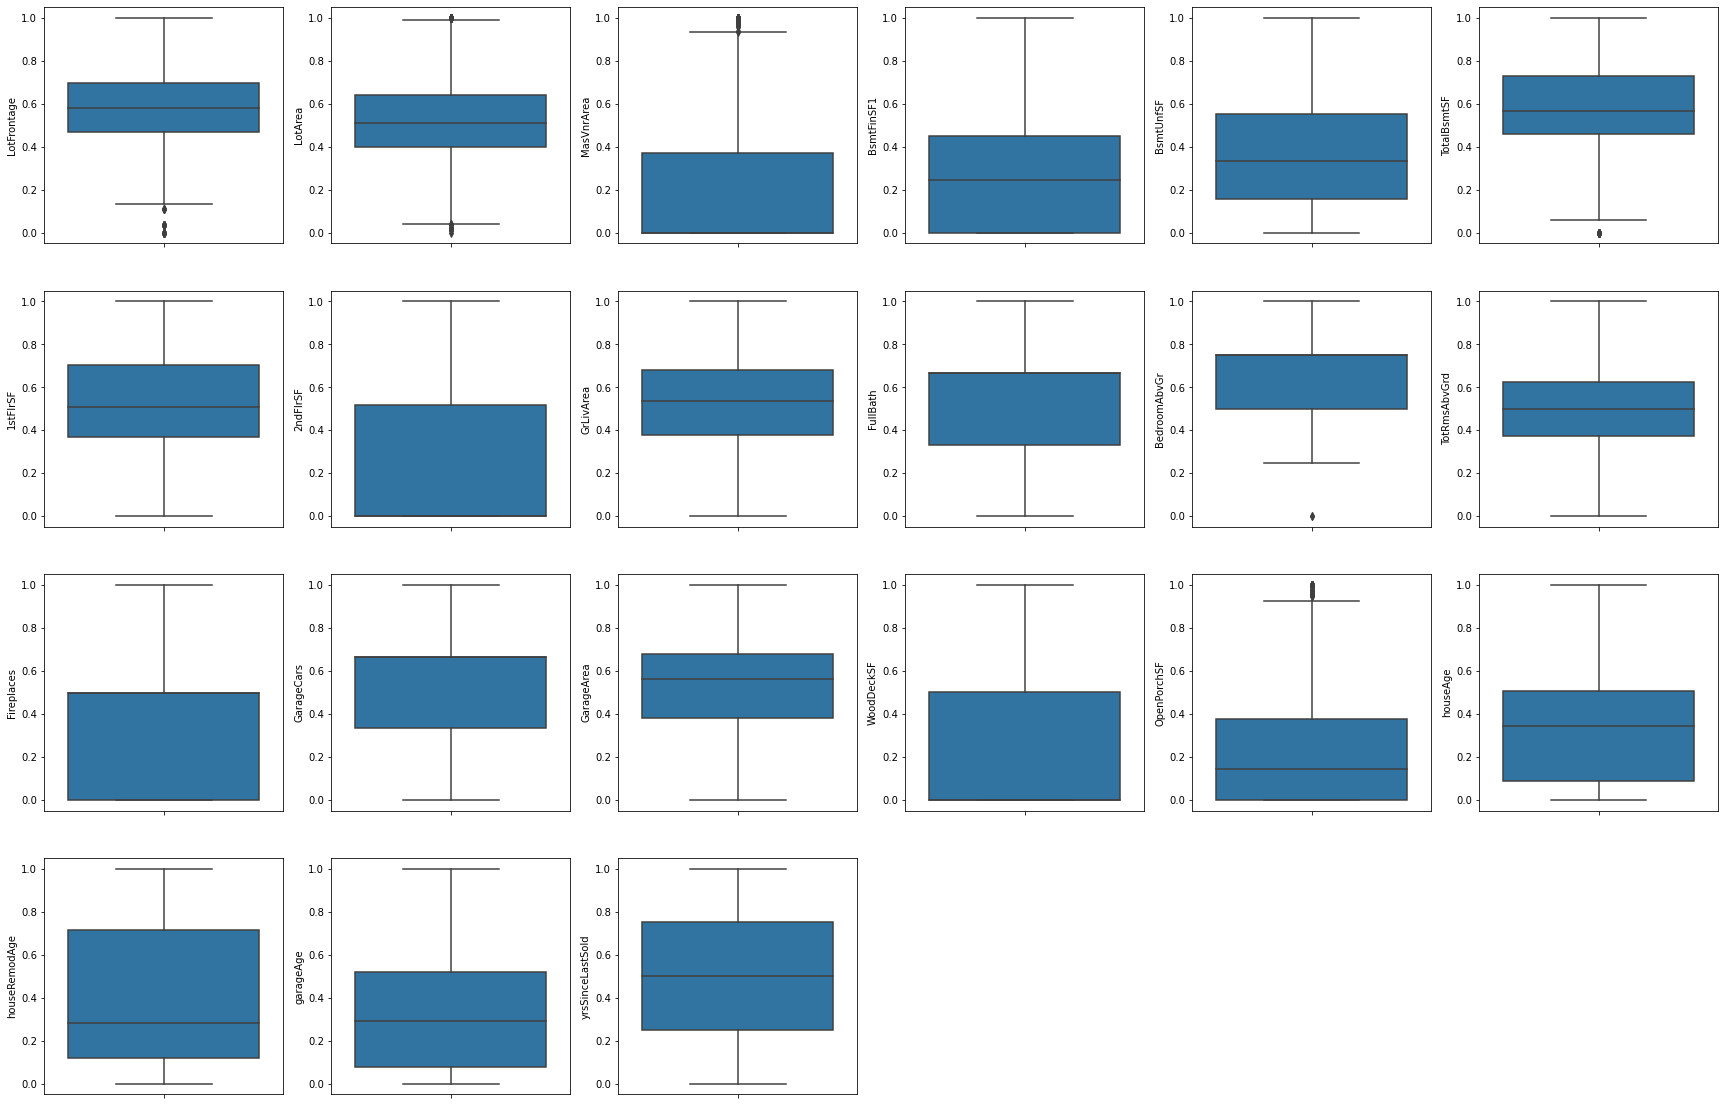

In [56]:
plt.figure(figsize=[30,20])
plt.tight_layout()

for i in range(1,len(Xnum_cols)+1):
    plt.subplot(4,6,i)
    sns.boxplot(X_train[Xnum_cols[i-1]],orient='v')
plt.show()
                  

In [57]:
X_test[Xnum_cols] =scaler.transform(X_test[Xnum_cols])
X_test[Xnum_cols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,houseAge,houseRemodAge,garageAge,yrsSinceLastSold
Id,,,,,,,,,,,,,,,,,,,,,
530,0.578313,1.000000,0.000000,0.775243,0.555858,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.875,1.0,0.666667,0.569345,0.000000,0.00000,0.478253,0.583333,0.377074,0.75
492,0.698795,0.508659,0.000000,0.256294,0.162125,0.459783,0.416764,0.436952,0.583462,0.333333,...,0.375,1.0,0.333333,0.282320,0.000000,0.00000,0.622631,1.000000,0.743374,1.00
460,0.578313,0.354944,0.353070,0.117654,0.356948,0.404450,0.430790,0.157867,0.407579,0.333333,...,0.375,0.5,0.333333,0.414069,0.000000,0.00000,0.541419,1.000000,0.646412,0.25
280,0.746988,0.540645,0.655702,0.249299,0.523161,0.661723,0.549007,0.610323,0.791708,0.666667,...,0.750,0.5,0.666667,0.594048,0.859701,0.66838,0.297780,0.550000,0.355527,0.50
656,0.000000,0.023601,0.835526,0.000000,0.357629,0.299487,0.127567,0.399600,0.355518,0.333333,...,0.500,0.0,0.333333,0.310552,0.000000,0.00000,0.351922,0.650000,0.420168,0.00


**3. Feature selection using RFE**

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 8),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('FullBath', True, 1),
 ('BedroomAbvGr', False, 26),
 ('TotRmsAbvGrd', False, 7),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('houseAge', True, 1),
 ('houseRemodAge', True, 1),
 ('garageAge', False, 37),
 ('yrsSinceLastSold', True, 1),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_Others', False, 29),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', False, 33),
 ('Street_Pave', True, 1),
 ('LotShape_Others', True, 1),
 ('LotShape_Reg', False, 15),
 ('LotConfig_Inside', False, 25),
 ('LotConfig_Others', False, 24),
 ('Neighborhood_NAmes', False, 16),
 ('Neighborhood_Others', False, 17),
 ('BldgType_Others', True, 1),
 ('HouseStyle_1Story', True, 1),
 ('HouseStyle_2Story', False, 28)

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'houseAge',
       'houseRemodAge', 'yrsSinceLastSold', 'MSSubClass_60', 'MSZoning_RL',
       'Street_Pave', 'LotShape_Others', 'BldgType_Others',
       'HouseStyle_1Story', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_Others', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_Others', 'RoofStyle_Hip', 'Exterior1st_MetalSd',
       'Exterior1st_Others', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng',
       'ExterQual_Others', 'BsmtQual_Others', 'BsmtExposure_Others',
       'BsmtFinType1_BLQ', 'BsmtFinType1_Others', 'BsmtFinType1_Unf',
       'HeatingQC_Others', 'HeatingQC_TA', 'KitchenQual_Others',
       'FireplaceQu_TA', 'GarageType_Others', 'GarageFinish_None',
       'GarageFinish_Unf', 'Fence_None', 'SaleCondition_Others'],
      dtype='object'

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [62]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test = X_test[X_train.columns]

We can use these columns now to run Ridge and Lasso Regularization

## Step 4: Lasso Regression

In [63]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [64]:
# Lasso

# alpha values

params = {
    'alpha':[0.00001,0.00002, 0.00003, 0.00004, 0.00005,0.0001, 0.0002, 
             0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 
             0.01]
}

lasso = Lasso()
lasso_model_cv = GridSearchCV(estimator=lasso,
                             param_grid=params,
                             scoring='r2',
                             cv=5,
                             return_train_score=True)
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='r2')

In [65]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009910,0.002774,0.002009,0.002460,1e-05,{'alpha': 1e-05},0.833070,0.869587,0.850490,0.873983,...,0.862129,0.018075,7,0.890421,0.882816,0.886842,0.881147,0.878688,0.883983,0.004173
1,0.006027,0.002014,0.000000,0.000000,2e-05,{'alpha': 2e-05},0.833127,0.869530,0.850548,0.874056,...,0.862148,0.018045,6,0.890419,0.882814,0.886840,0.881145,0.878686,0.883981,0.004173
2,0.005723,0.003463,0.002002,0.002452,3e-05,{'alpha': 3e-05},0.833191,0.869472,0.850604,0.874128,...,0.862167,0.018013,5,0.890416,0.882811,0.886836,0.881142,0.878683,0.883978,0.004173
3,0.005011,0.003174,0.000000,0.000000,4e-05,{'alpha': 4e-05},0.833271,0.869413,0.850658,0.874198,...,0.862188,0.017975,4,0.890411,0.882807,0.886831,0.881137,0.878679,0.883973,0.004173
4,0.008945,0.002962,0.002017,0.004035,5e-05,{'alpha': 5e-05},0.833350,0.869352,0.850710,0.874266,...,0.862207,0.017938,3,0.890406,0.882801,0.886824,0.881132,0.878673,0.883967,0.004173


In [66]:
lasso_model_cv.best_params_

{'alpha': 0.0001}

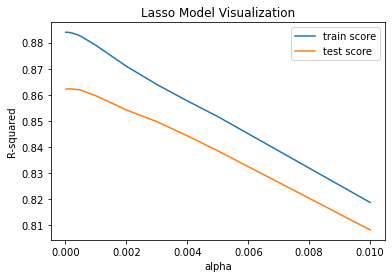

In [67]:
# Plot the mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.title("Lasso Model Visualization")
plt.legend(['train score','test score'], loc='best')
plt.show();


In [68]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [69]:
lasso.coef_

array([ 0.05962315,  0.12551272,  0.06361773, -0.03228848,  0.28031971,
        0.2107953 ,  0.24989731,  0.28319973,  0.06495249,  0.11870947,
        0.10623815,  0.0384202 ,  0.04716071,  0.04510544, -0.31244173,
       -0.14822455,  0.02229072, -0.07620877,  0.04296456,  0.17009641,
        0.04239039, -0.04839622, -0.03760483,  0.03183529,  0.08160344,
        0.12398499, -0.02243003,  0.05032366,  0.08890262, -0.02842323,
        0.0327996 ,  0.04252392,  0.02150545, -0.02913648,  0.06228227,
        0.03374017,  0.05982705,  0.0260239 , -0.02788244, -0.04606619,
       -0.04427886, -0.09428359, -0.03433093,  0.08725307, -0.03638185,
       -0.04257486, -0.07168549, -0.02347818,  0.02057544, -0.02909088])

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr=',r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr=',r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr=',rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr=',rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr=',mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr=',    mse_test_lr)
metric1.append(mse_test_lr**0.5)

r2_train_lr= 0.8817268644595017
r2_test_lr= 0.8542855051697431
rss1_lr= 19.528685009155936
rss2_lr= 9.861356240899653
mse_train_lr= 0.019108302357295437
mse_test_lr= 0.02251451196552432


In [71]:
lassoDF = pd.DataFrame({'Features':X_train.columns,'Coefficients':lasso.coef_})
print(lassoDF.sort_values('Coefficients',ascending=False).head(10))
print()
print(lassoDF.sort_values('Coefficients',ascending=False).tail(10))

         Features  Coefficients
7       GrLivArea      0.283200
4     TotalBsmtSF      0.280320
6        2ndFlrSF      0.249897
5        1stFlrSF      0.210795
19    Street_Pave      0.170096
1         LotArea      0.125513
25  OverallQual_8      0.123985
9      Fireplaces      0.118709
10     GarageCars      0.106238
28  OverallCond_7      0.088903

               Features  Coefficients
22    HouseStyle_1Story     -0.037605
45    GarageType_Others     -0.042575
40     BsmtFinType1_Unf     -0.044279
39  BsmtFinType1_Others     -0.046066
21      BldgType_Others     -0.048396
46    GarageFinish_None     -0.071685
17        MSSubClass_60     -0.076209
41     HeatingQC_Others     -0.094284
15        houseRemodAge     -0.148225
14             houseAge     -0.312442


**From the above coefficients, it appears that the top 5 variables with highest impact on Sale Price are:**
1. houseAge - Interpreted from YearBuilt : The older the house, lower the price.
2. GrLivArea - More the Above grade (ground) living area square feet, higher the Sale Price.
3. TotalBsmtSF - More the Total square feet of basement area, higher the Sale Price.
4. 2ndFlrSF: More the Second floor square feet, higher the Sale Price.
5. 1stFlrSF: More the First Floor square feet, higher the Sale Price.

## Step 5: Ridge Regression

In [72]:
# Ridge
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}

ridge = Ridge()
ridge_model_cv = GridSearchCV(estimator=ridge,
                             param_grid=params,
                             scoring='r2',
                             cv=5,
                             return_train_score=True)
ridge_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='r2')

In [73]:
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006042,0.005869,0.004956,0.003057,0.0001,{'alpha': 0.0001},0.833020,0.869643,0.850406,0.873904,...,0.862108,0.018108,20,0.890422,0.882817,0.886843,0.881148,0.878689,0.883984,0.004173
1,0.002002,0.002451,0.003992,0.003724,0.001,{'alpha': 0.001},0.833022,0.869643,0.850411,0.873906,...,0.862110,0.018108,19,0.890422,0.882817,0.886843,0.881148,0.878689,0.883984,0.004173
2,0.005038,0.003183,0.001001,0.002002,0.01,{'alpha': 0.01},0.833041,0.869644,0.850465,0.873917,...,0.862131,0.018101,18,0.890422,0.882817,0.886843,0.881148,0.878689,0.883983,0.004173
3,0.002911,0.002383,0.003010,0.004016,0.05,{'alpha': 0.05},0.833124,0.869645,0.850688,0.873966,...,0.862220,0.018072,17,0.890421,0.882816,0.886841,0.881147,0.878687,0.883982,0.004173
4,0.003008,0.002451,0.001003,0.002006,0.1,{'alpha': 0.1},0.833221,0.869643,0.850942,0.874025,...,0.862320,0.018039,16,0.890418,0.882814,0.886835,0.881145,0.878684,0.883979,0.004172


In [74]:
ridge_model_cv.best_params_

{'alpha': 2.0}

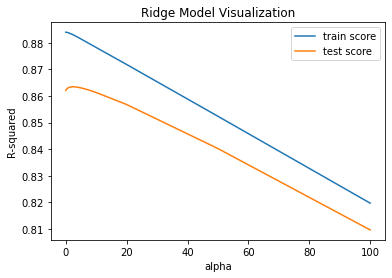

In [75]:
# Plot the mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.title("Ridge Model Visualization")
plt.legend(['train score','test score'], loc='best')
plt.show();


In [76]:
alpha = 2.0

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=2.0)

In [77]:
ridge.coef_

array([ 0.06167585,  0.12137022,  0.08599281, -0.00724358,  0.24441333,
        0.20925846,  0.23087722,  0.26530977,  0.07898412,  0.1194108 ,
        0.10018633,  0.0539918 ,  0.05122459,  0.04728652, -0.27652593,
       -0.15239232,  0.02309783, -0.06569472,  0.04675039,  0.13711077,
        0.04526443, -0.04479821, -0.04177334,  0.03230324,  0.08384787,
        0.12653195, -0.02549028,  0.04665517,  0.08373122, -0.03386084,
        0.03479343,  0.04107077,  0.02144052, -0.03265011,  0.06226322,
        0.03602483,  0.06135146,  0.02651426, -0.02731657, -0.0462411 ,
       -0.0466858 , -0.09524859, -0.03537075,  0.08695066, -0.03517751,
       -0.04305679, -0.07323393, -0.02556148,  0.02151071, -0.02783053])

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr=',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr=',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr=',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr=',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr=',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr=',    mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr= 0.8813225425589586
r2_test_lr= 0.8539468713926014
rss1_lr= 19.595444675262065
rss2_lr= 9.884273578776618
mse_train_lr= 0.019173624926870907
mse_test_lr= 0.022566834654741137


In [79]:
ridgeDF = pd.DataFrame({'Features':X_train.columns,'Coefficients':ridge.coef_})
print(ridgeDF.sort_values('Coefficients',ascending=False).head(10))
print()
print(ridgeDF.sort_values('Coefficients',ascending=False).tail(10))

              Features  Coefficients
7            GrLivArea      0.265310
4          TotalBsmtSF      0.244413
6             2ndFlrSF      0.230877
5             1stFlrSF      0.209258
19         Street_Pave      0.137111
25       OverallQual_8      0.126532
1              LotArea      0.121370
9           Fireplaces      0.119411
10          GarageCars      0.100186
43  KitchenQual_Others      0.086951

               Features  Coefficients
22    HouseStyle_1Story     -0.041773
45    GarageType_Others     -0.043057
21      BldgType_Others     -0.044798
39  BsmtFinType1_Others     -0.046241
40     BsmtFinType1_Unf     -0.046686
17        MSSubClass_60     -0.065695
46    GarageFinish_None     -0.073234
41     HeatingQC_Others     -0.095249
15        houseRemodAge     -0.152392
14             houseAge     -0.276526


**From the above coefficients, it appears that the top 5 variables with highest impact on Sale Price are:**
1. houseAge - Interpreted from YearBuilt : The older the house, lower the price.
2. GrLivArea - More the Above grade (ground) living area square feet, higher the Sale Price.
3. TotalBsmtSF - More the Total square feet of basement area, higher the Sale Price.
4. 2ndFlrSF: More the Second floor square feet, higher the Sale Price.
5. 1stFlrSF: More the First Floor square feet, higher the Sale Price.

In [80]:
# Creating a table which contain all the metrics

ls_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Lasso Regression': metric1
        }

ls_metric = pd.DataFrame(ls_table ,columns = ['Metric', 'Lasso Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
# ls_metric = pd.Series(metric1, name = 'Lasso Regression')

final_metric = pd.concat([ls_metric, rg_metric, ], axis = 1)

final_metric

,Metric,Lasso Regression,Ridge Regression
0,R2 Score (Train),0.881727,0.881323
1,R2 Score (Test),0.854286,0.853947
2,RSS (Train),19.528685,19.595445
3,RSS (Test),9.861356,9.884274
4,MSE (Train),0.138233,0.138469
5,MSE (Test),0.150048,0.150223


**As can be observed, Lasso Regression performs slightly better than Ridge Regression.**